***
## Alzheimer Disease

### *Import libs*

In [1]:
# Basic libs for working with data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
import scipy as sci
import plotly.express as px

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', 
              palette='coolwarm', 
              rc={'figure.figsize' :(15,10)})

# ? Display Multi-output
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


***

## Dataset Loading

### *Load data from local*

- *Using these script to load data from your local*

- *File downloaded requires (if not)*

In [2]:
# check for dataset file

local_default_path = "alzheimer_disease_data_custom.csv"
alzheimer_df = pd.read_csv(local_default_path)

### *Load data from Kaggle*

- *Using this script to load dataset if you're working on kaggle Notebook*
- *Import dataset into Kaggle Input Folder required*

- <a href="https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data"> *Original dataset* </a>

In [3]:
# kaggle_file_path = '/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv'
# alzheimer_df_original = pd.read_csv(kaggle_file_path)
# alzheimer_df_original

### *Fetch data from Github*

- *Using these script when you're working on Kaggle or Colab or even local*
- *Not required download file but fetching it instead*

- *Loading speed depends on your network*


In [4]:
# url_path = 'https://raw.githubusercontent.com/lovecrushfamily/Alzheimer_Disease/refs/heads/main/alzheimers_disease_data.csv'
# alzheimer_df = pd.read_csv(url_path)
# alzheimer_df

***


## Dataset Overview

### *No.Features, No.Samples, Datatypes*

**Train set:**

- *2352 rows × 35 columns*


In [5]:
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,4752,89.0,Male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4755,NaN,Male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,5535,62.0,Male,Asian,Bachelor's,37.204794,NaN,15.866661,0.834477,7.408433,8.910176,No,No,No,No,No,No,129.0,112.0,218.898884,61.511821,82.962286,146.182027,0.594672,7.616162,No,No,7.948689,No,No,NaN,NaN,No,No,XXXConfid
2348,6601,83.0,Female,African American,NaN,25.730770,No,15.194961,1.019401,7.670402,6.623771,No,No,No,Yes,No,Yes,97.0,83.0,170.317799,83.735742,97.711721,163.500278,7.830375,2.403691,No,No,7.125541,No,No,NaN,No,No,No,XXXConfid
2349,5528,90.0,NaN,Asian,Bachelor's,15.387136,No,15.821380,NaN,2.240311,6.253344,No,No,No,No,No,No,97.0,61.0,NaN,68.865280,33.995829,60.951975,28.876218,3.136569,No,No,3.733343,No,No,No,NaN,No,No,XXXConfid
2350,6815,74.0,Female,African American,NaN,38.916401,Yes,0.923593,9.658794,9.606757,8.309027,No,Yes,No,NaN,No,No,133.0,68.0,176.426489,163.637099,64.930858,280.277147,22.782386,1.280363,No,No,5.078113,Yes,Yes,Yes,No,Yes,Yes,XXXConfid


In [6]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2352 non-null   int64  
 1   Age                        2045 non-null   float64
 2   Gender                     1762 non-null   object 
 3   Ethnicity                  2352 non-null   object 
 4   EducationLevel             1872 non-null   object 
 5   BMI                        2352 non-null   float64
 6   Smoking                    1654 non-null   object 
 7   AlcoholConsumption         2163 non-null   float64
 8   PhysicalActivity           2163 non-null   float64
 9   DietQuality                2156 non-null   float64
 10  SleepQuality               2352 non-null   float64
 11  FamilyHistoryAlzheimers    2352 non-null   object 
 12  CardiovascularDisease      2352 non-null   object 
 13  Diabetes                   2352 non-null   objec

***

## Exploratory Data Analysis

### *Missing values* 

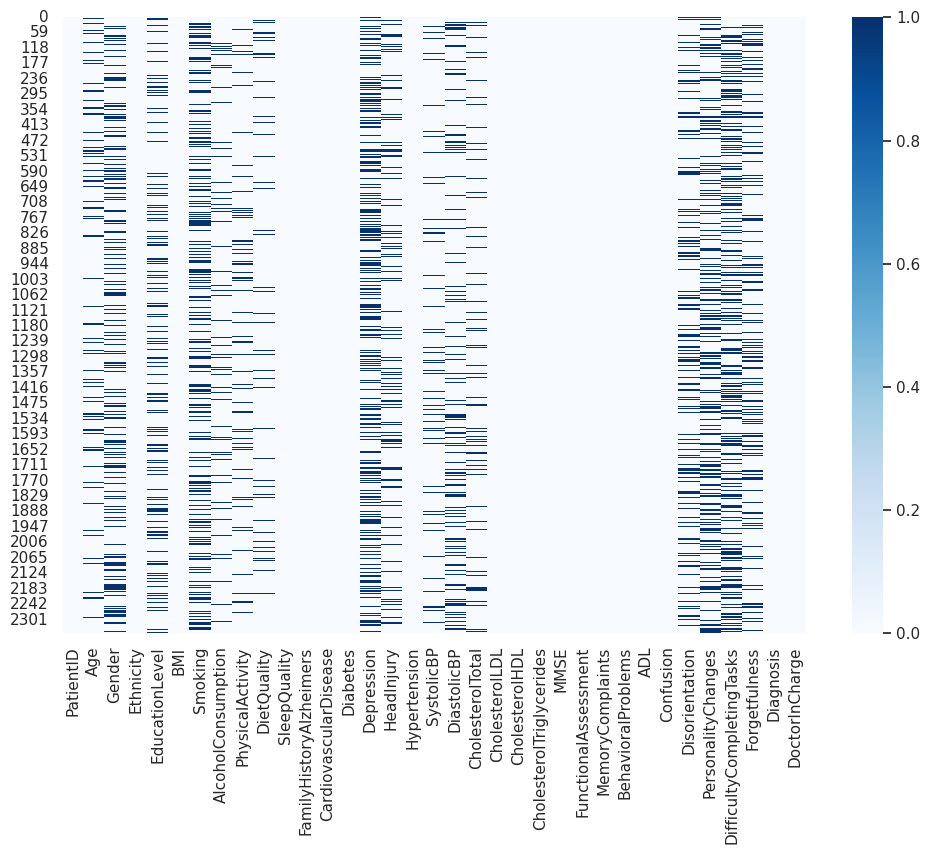

In [7]:
plt.subplots(figsize=(12, 8))
sns.heatmap(alzheimer_df.isnull(), cmap='Blues')

plt.show()

In [8]:
def report_missing_values(train_set:pd.DataFrame, test_set:pd.DataFrame=None):
    """"""
    miss_train_count = train_set.isnull().sum()
    miss_train_ratio = train_set.isnull().sum() / len(train_set) * 100

    cols_name = ['No. train set', "Ratio"]

    missing_report = pd.DataFrame([miss_train_count,miss_train_ratio.round(3),]).T
    missing_report.columns = cols_name

    
    if test_set is not None:
        missing_report["<> No. test set"] = test_set.isnull().sum()
        missing_report["test_ratio"] = round(test_set.isnull().sum() / len(test_set) * 100, 2)

    missing_report.sort_values("No. train set", inplace=True, ascending=False)

    return missing_report



In [9]:
report_missing_values(train_set=alzheimer_df)

,No. train set,Ratio
Depression,772.0,32.823
DifficultyCompletingTasks,733.0,31.165
Smoking,698.0,29.677
PersonalityChanges,598.0,25.425
Gender,590.0,25.085
EducationLevel,480.0,20.408
Forgetfulness,415.0,17.645
DiastolicBP,411.0,17.474
Disorientation,352.0,14.966
HeadInjury,333.0,14.158


### *Duplicated records*

In [10]:
def filter_duplicated_records(train_set:pd.DataFrame):

    dup_ratio = train_set.duplicated().value_counts(normalize=True).to_frame()
    dup_count = train_set.duplicated().value_counts().to_frame()

    return pd.concat([dup_ratio, dup_count], axis=1)


filter_duplicated_records(alzheimer_df)


,proportion,count
False,0.91369,2149
True,0.08631,203


**False:** *indicating the number of unique records in dataset*

**True** *indicating the number of duplicated records in dataset*

### *Numerical Data*

In [11]:
def numerical_vars(df:pd.DataFrame, discrete_limit:int=5):
    vars_type = []

    for col in df.columns:
        if len(df[col].value_counts().values) <= discrete_limit:
            vars_type.append("Discrete ")

        else:
            vars_type.append("Continuos")

    return vars_type
    

def mcv_freq(df:pd.DataFrame, mcv:pd.DataFrame ) -> float:
    """The function take the dataframe `df` and the dataframe `mcv`
    Args:
        df : the original data
        mcv : the most common value in each columns"""
    mcv_freq_= []
    for idx, col in enumerate(df.columns):
        mcv_freq_.append((df[df[col]==mcv[idx]].shape[0] / df.shape[0]) )

    return mcv_freq_

                
def outlier_prop(df:pd.DataFrame, lower_f:pd.DataFrame, upper_f:pd.DataFrame):
    """The function take lower_fence and upper fence as the two indicator of outlier
    Outliers are values that fall outside of these fence, 
    smaller than lower_f and higher than upper_f"""
    outliers_prop_ = []

    for idx, col in enumerate(df.columns):
        n_outliers = df[(df[col] > upper_f[idx]) | (df[col] < lower_f[idx])].shape[0]
        outliers_prop_.append(n_outliers / df.shape[0] * 100)
        
    return outliers_prop_
 

 

In [12]:
num_cols = alzheimer_df.select_dtypes(exclude=['object']).columns

num_stats = alzheimer_df[num_cols].describe().transpose()
num_stats['IQR'] = num_stats["75%"] -  num_stats["25%"]
num_stats['lower fence'] = num_stats["25%"] - (num_stats['IQR']  * 1.5)
num_stats['upper fence'] = num_stats["75%"] + (num_stats['IQR']  * 1.5)
num_stats['skewness'] = alzheimer_df[num_cols].skew()
num_stats['kurtosis'] = alzheimer_df[num_cols].kurtosis()
# num_stats['mcv'] = alzheimer_df[num_cols].mode().T
# num_stats['mcv freq'] = mcv_freq(alzheimer_df[num_cols], num_stats['mcv'])
num_stats['outliers prop'] = outlier_prop(alzheimer_df[num_cols], num_stats['lower fence'], num_stats['upper fence'])
num_stats['vars'] = numerical_vars(alzheimer_df[num_cols], discrete_limit=15)

num_stats.sort_values('vars').round(3)


,count,mean,std,min,25%,50%,75%,max,IQR,lower fence,upper fence,skewness,kurtosis,outliers prop,vars
PatientID,2352.0,5825.843,620.182,4751.000,5288.750,5825.000,6362.250,6899.000,1073.500,3678.500,7972.500,-0.004,-1.202,0.000,Continuos
Age,2045.0,74.985,8.991,60.000,67.000,75.000,83.000,90.000,16.000,43.000,107.000,0.034,-1.197,0.000,Continuos
BMI,2352.0,28.034,10.038,15.009,21.615,27.805,33.917,192.000,12.302,3.161,52.371,6.326,87.573,0.383,Continuos
AlcoholConsumption,2163.0,9.986,5.805,0.002,4.973,9.866,15.174,19.989,10.201,-10.329,30.476,0.033,-1.216,0.000,Continuos
PhysicalActivity,2163.0,4.929,2.872,0.004,2.540,4.860,7.456,9.987,4.916,-4.835,14.831,0.028,-1.202,0.000,Continuos
DietQuality,2156.0,5.015,3.226,0.009,2.430,5.059,7.559,70.000,5.129,-5.264,15.253,3.766,74.780,0.043,Continuos
SleepQuality,2352.0,7.022,1.769,4.003,5.436,7.088,8.550,10.000,3.114,0.766,13.221,-0.049,-1.220,0.000,Continuos
SystolicBP,2175.0,134.287,25.968,90.000,111.000,134.000,157.000,179.000,46.000,42.000,226.000,0.015,-1.200,0.000,Continuos
DiastolicBP,1941.0,89.897,17.672,60.000,74.000,91.000,105.000,119.000,31.000,27.500,151.500,-0.057,-1.249,0.000,Continuos
CholesterolTotal,2125.0,225.971,42.763,150.093,191.216,226.842,263.384,299.993,72.168,82.964,371.635,-0.052,-1.162,0.000,Continuos


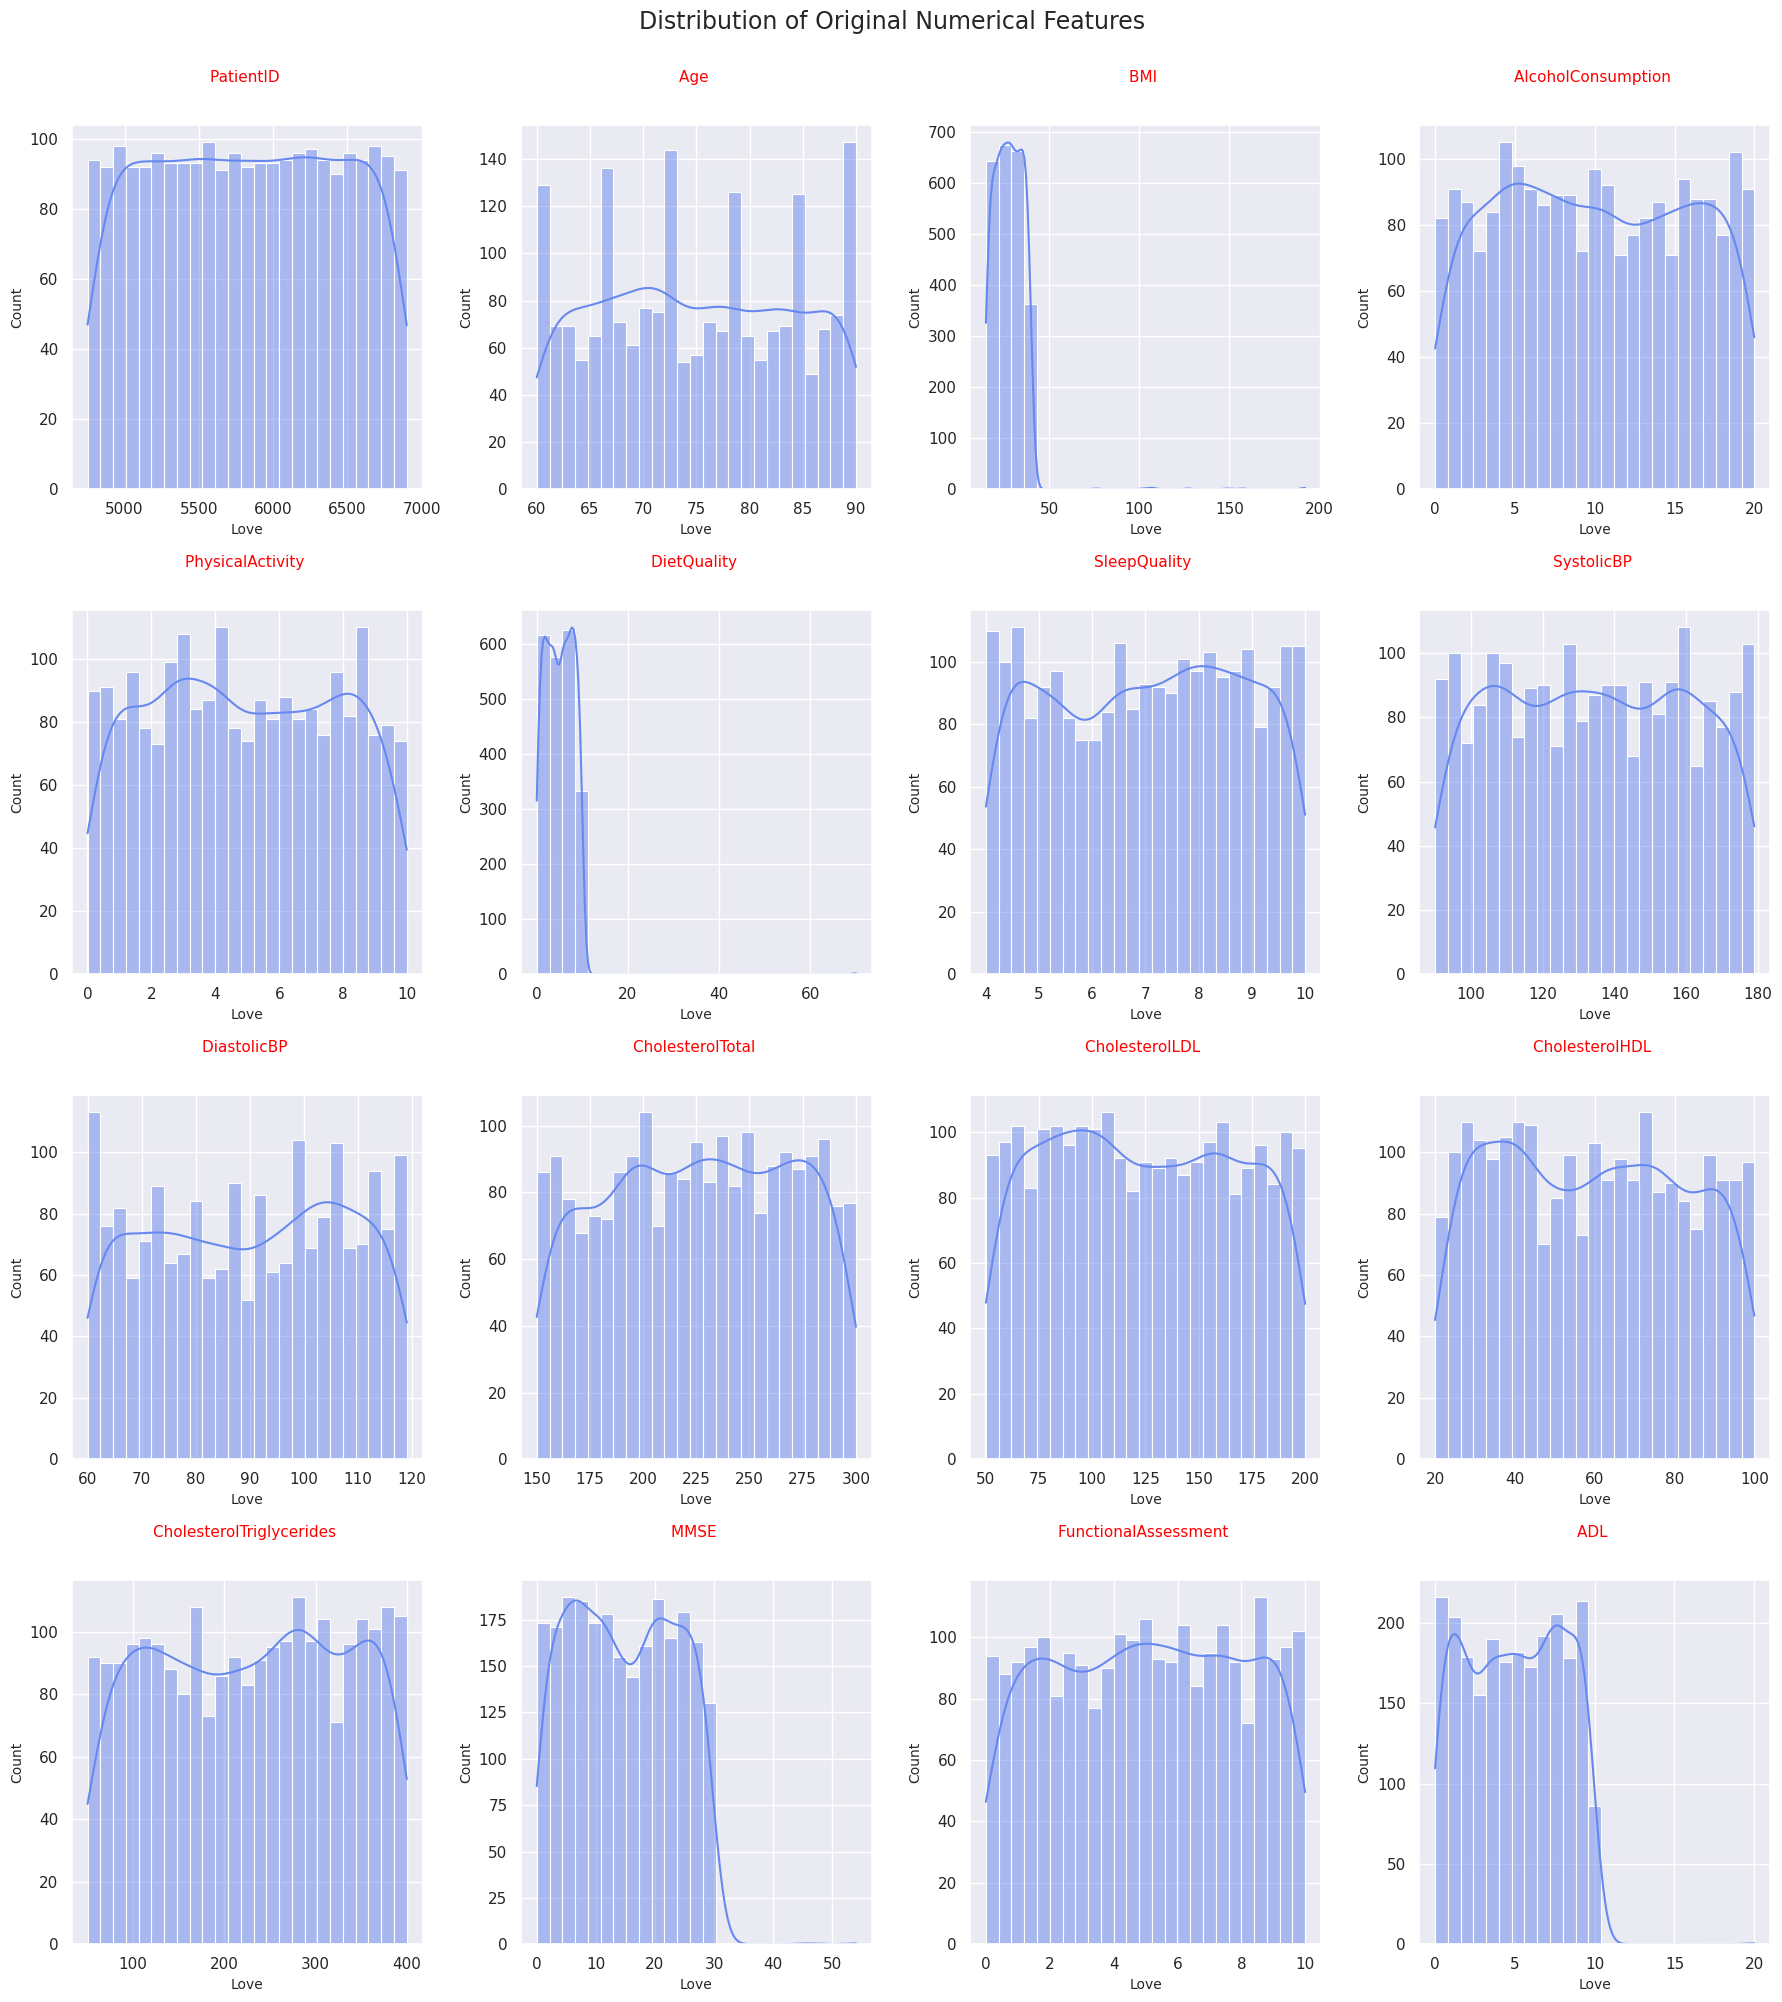

In [13]:

n_cols = 4   
n_rows = (len(num_cols) + n_cols - 1) // n_cols                     

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

axes = axes.ravel()

fig.suptitle("Distribution of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(num_stats.index):

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_xlabel("Love", fontsize=10)
    ax.set_title(f'{column} \n\n',
                fontsize=11, 
                color='red')
    
    sns.histplot(alzheimer_df[column], kde=True, bins=25, ax=ax, palette="Blues")


# Remove empty subplots if necessary
if len(num_cols) < n_cols * n_rows:
    for i in range(len(num_cols), n_cols * n_rows):
        fig.delaxes(axes[i])


plt.tight_layout()
plt.show()



### Categorical data

In [14]:
cat_cols = alzheimer_df.select_dtypes(include=['object']).drop(columns={'Diagnosis'}).columns

cat_stats = alzheimer_df[cat_cols].describe(include='object').T
cat_stats['null vals'] = alzheimer_df.shape[0] - cat_stats['count']
cat_stats['null prop'] = cat_stats['null vals'] / alzheimer_df.shape[0] * 100
cat_stats['freq prop'] = cat_stats['freq'] / alzheimer_df.shape[0] * 100

cat_stats.sort_values('freq prop', inplace=True, ascending=False)

cat_stats

,count,unique,top,freq,null vals,null prop,freq prop
DoctorInCharge,2352,1,XXXConfid,2352,0,0.0,100.0
CardiovascularDisease,2352,2,No,2008,0,0.0,85.37415
Hypertension,2352,2,No,2002,0,0.0,85.119048
Diabetes,2352,2,No,1999,0,0.0,84.991497
BehavioralProblems,2352,2,No,1988,0,0.0,84.52381
Confusion,2352,2,No,1871,0,0.0,79.54932
MemoryComplaints,2352,2,No,1861,0,0.0,79.12415
HeadInjury,2019,2,No,1829,333,14.158163,77.763605
FamilyHistoryAlzheimers,2352,2,No,1750,0,0.0,74.404762
Disorientation,2000,2,No,1671,352,14.965986,71.045918


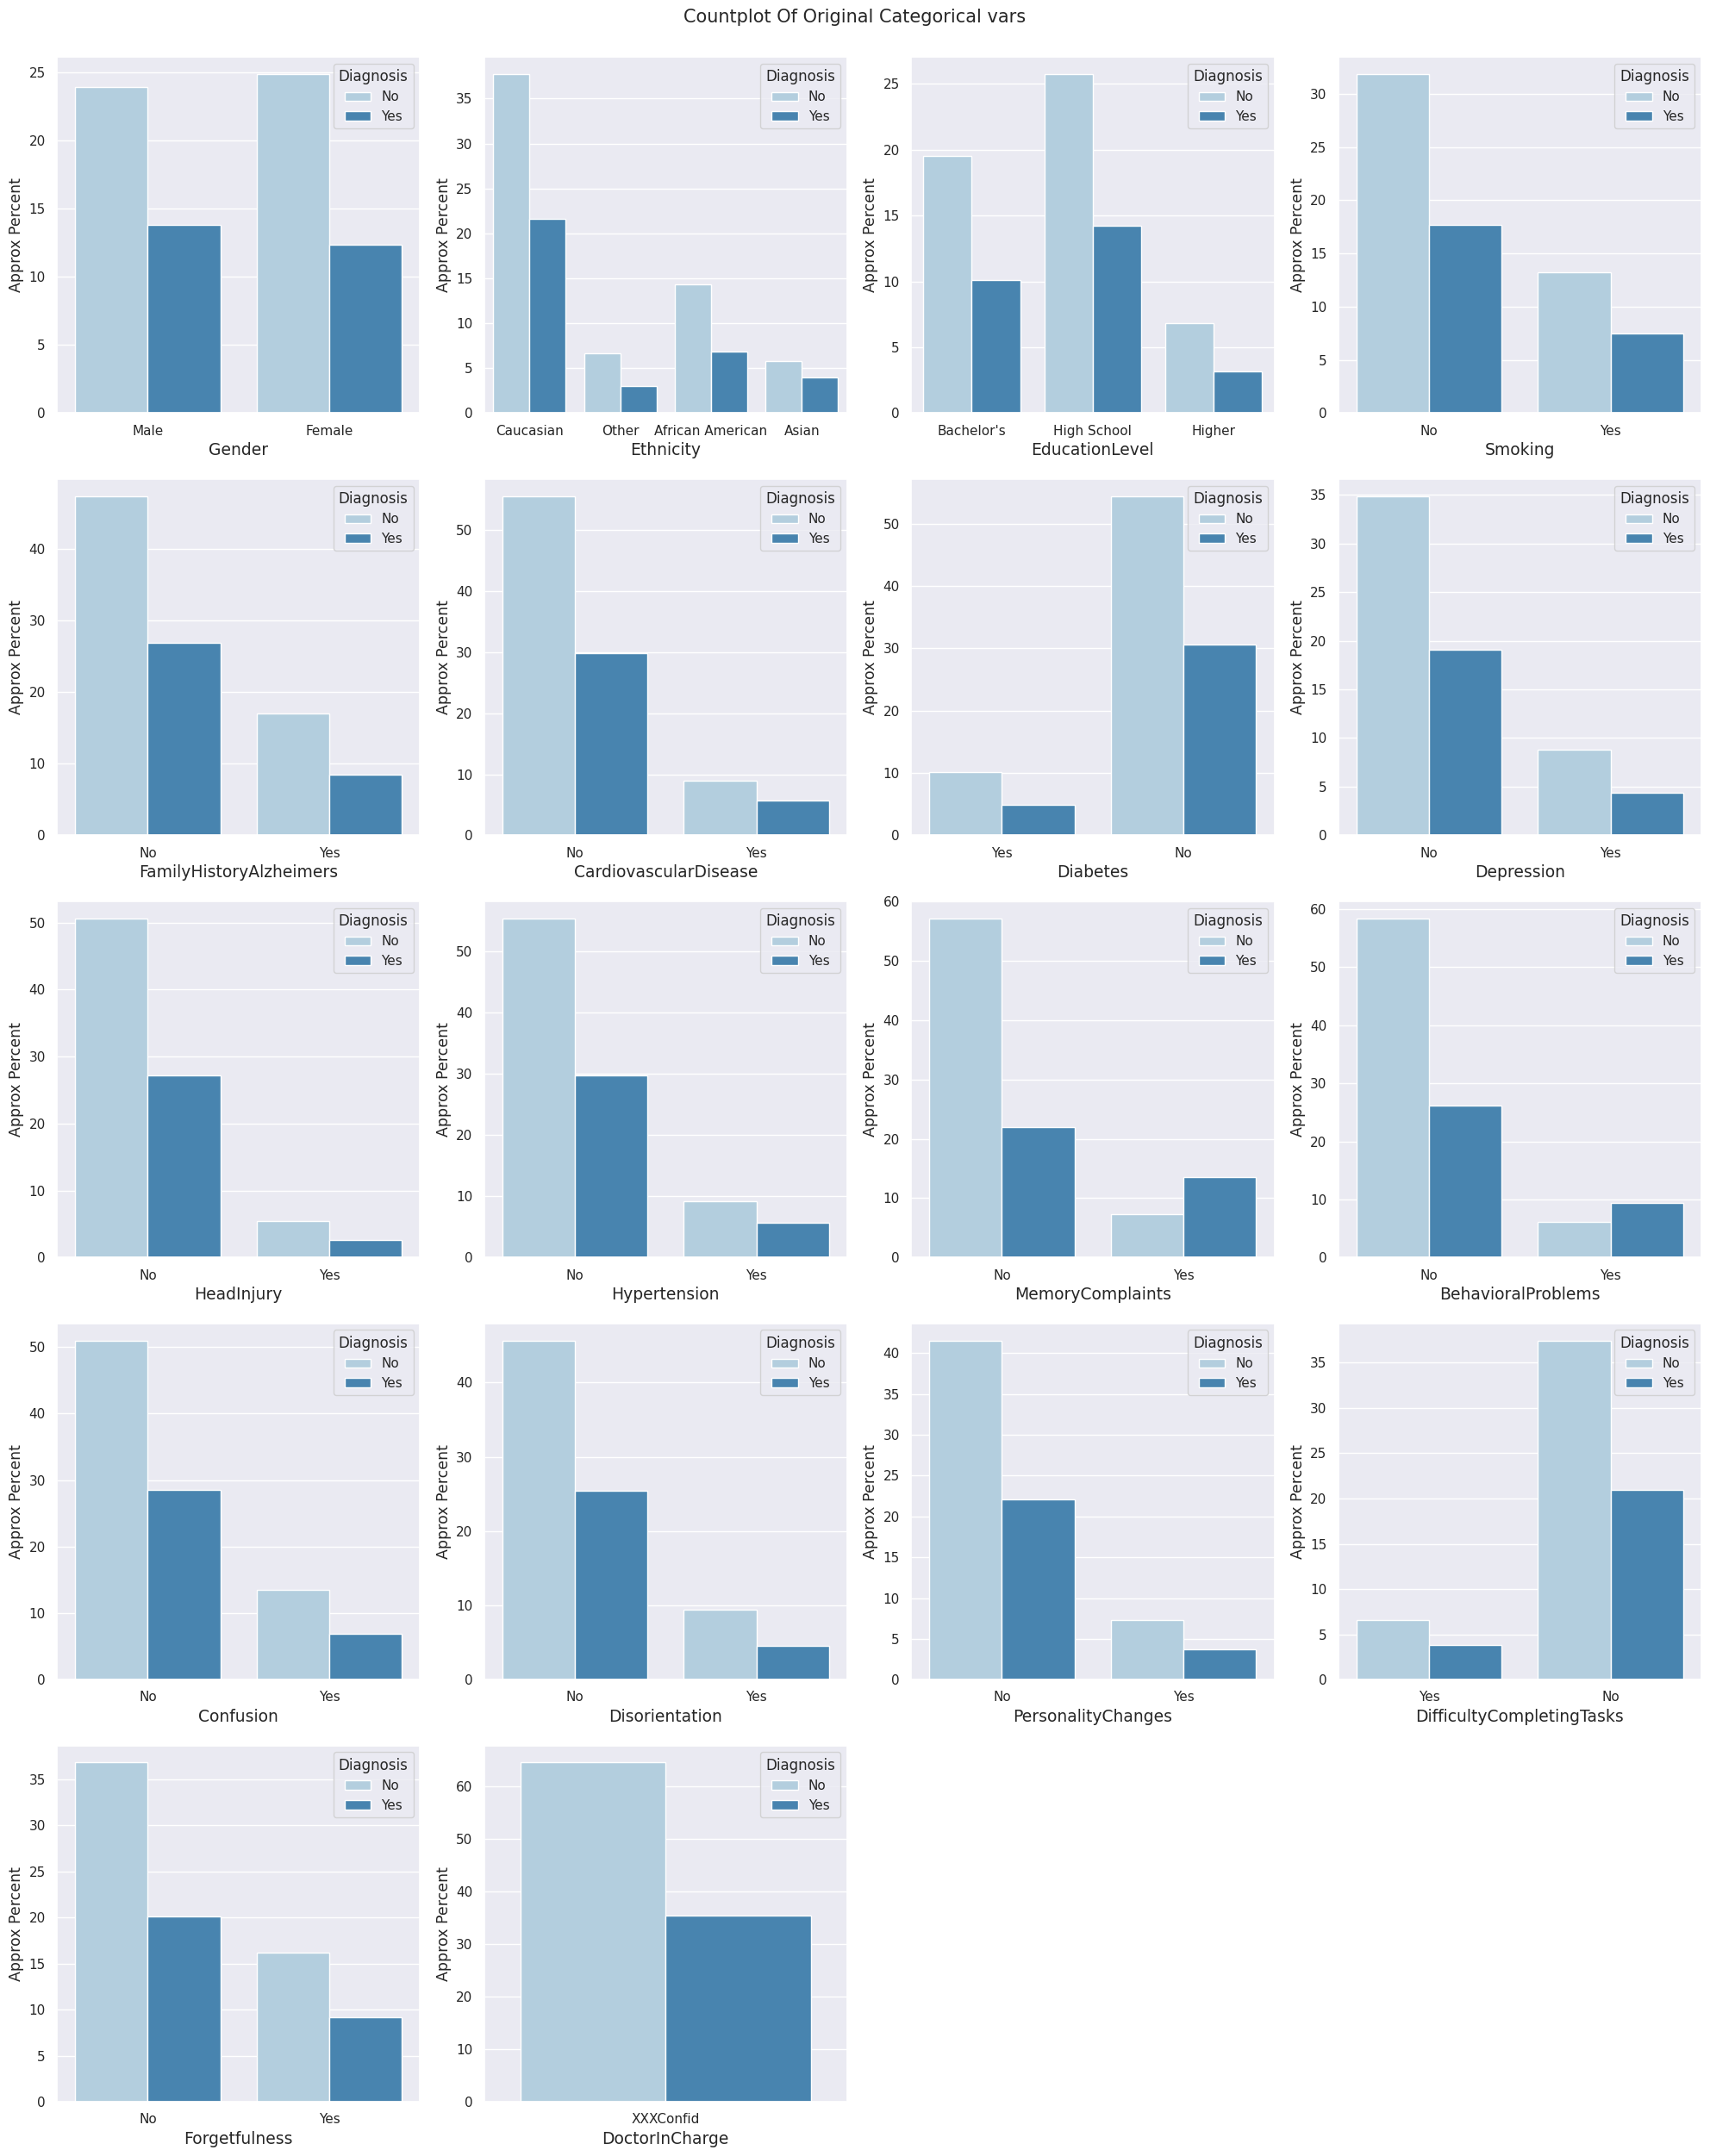

In [15]:
n_cols = 4
num_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(num_rows, n_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Categorical vars", y=1, fontsize=15)

for i, column in enumerate(cat_cols):

    ax = axes[i]
    ax.set_xlabel(column, fontsize=13.5)
    ax.set_ylabel('Approx Percent', fontsize=12.5)

    sns.countplot(data=alzheimer_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                  hue='Diagnosis',    
                  stat='percent')

# Remove empty subplots if necessary
if len(cat_cols) < n_cols * num_rows:
    for i in range(len(cat_cols), n_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


### *Target feature*

In [16]:
tar_col = "Diagnosis"

def target_prop(train_set:pd.DataFrame, target_feature):

    dup_ratio = train_set[target_feature].value_counts(normalize=True).to_frame()
    dup_count = train_set[target_feature].value_counts().to_frame()

    return pd.concat([dup_ratio, dup_count], axis=1)

target_prop(alzheimer_df, tar_col)


,proportion,count
Diagnosis,,
No,0.645408,1518
Yes,0.354592,834


- *Imbalanced class*

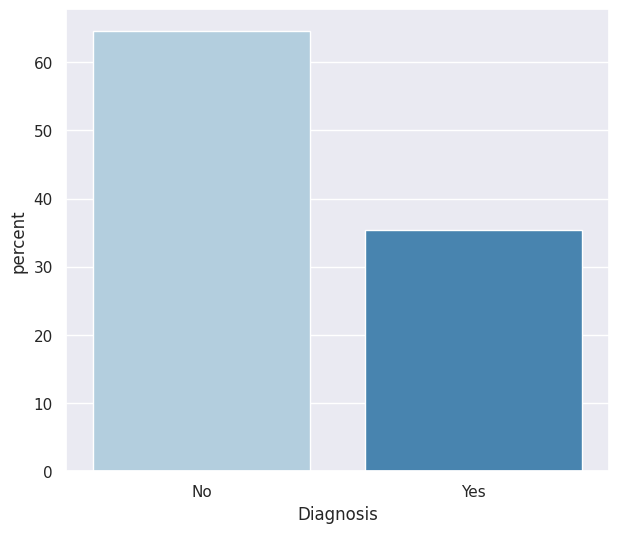

In [17]:
diagnosis_count = alzheimer_df.value_counts(dropna=False)
diagnosis_ratio = alzheimer_df.value_counts(normalize=True, dropna=False)

plt.figure(figsize=(7, 6))

sns.countplot(data=alzheimer_df,
                  x='Diagnosis', 
                  palette='Blues', 
                  hue=alzheimer_df['Diagnosis'],    
                  stat='percent')
plt.show()


***

***

## Preparing data

- *Manually*

### *Handle duplicated records*

In [18]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class DuplicateDropper(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.columns = None     # initialize the columns attributes

#     @property
#     def columns_(self):
#         if self.columns is None:
#             raise Exception("None of columns was pass in.")
#         return self.columns
    

#     def fit(self, X, y=None):
        
        
# from sklearn.pipeline import Pipeline, FunctionTransformer, FeatureUnion
# from sklearn.compose import ColumnTransformer


# FunctionTransformer(accept_sparse=False)

# preparing_trans = ColumnTransformer(transformers=[
#     ("drop duplicated", FunctionTransformer(drop_dup), ["Age"])
# ],
# remainder="passthrough", 
# verbose=True)

# preparing_trans

# preparing_pipeline = make_pipeline(
#     FunctionTransformer(drop_dup(alzheimer_df, alzheimer_df.columns))
# )


# preparing_pipeline

    

In [19]:
def drop_dup(df:pd.DataFrame, columns=None) -> None:
    return df[columns].drop_duplicates()

alzheimer_df_drop_dup = drop_dup(alzheimer_df, columns=alzheimer_df.columns)

filter_duplicated_records(alzheimer_df_drop_dup)


,proportion,count
False,1.0,2149


***

## Data Wrangling

## Data Mining

- *[Data exploration]("https://www.linkedin.com/pulse/data-exploration-visualization-association-rules-massimo-re-aw5rf/")*

- *[Knn]("https://www.linkedin.com/pulse/data-mining-classification-k-nearest-neighbors-k-nn-massimo-re-mlsyf/")*

### *Association Rule with Apriori*

In [89]:
alzheimer_df_drop_dup

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No
1,89.0,Male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No
2,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No
3,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No
4,NaN,Male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61.0,Male,Caucasian,High School,39.121757,No,1.561126,4.049964,6.555306,7.535540,No,No,No,No,No,No,122.0,101.0,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,No,No,4.492838,Yes,No,No,NaN,No,Yes
2145,75.0,NaN,Caucasian,Bachelor's,17.857903,No,18.767261,1.360667,2.904662,8.555256,No,No,No,No,No,No,152.0,NaN,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,No,Yes,9.204952,No,No,No,No,No,Yes
2146,77.0,NaN,Caucasian,High School,15.476479,No,4.594670,9.886002,8.120025,5.769464,No,No,No,No,No,No,115.0,118.0,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,No,No,5.036334,No,No,No,NaN,No,Yes
2147,78.0,NaN,Other,High School,15.299911,NaN,8.674505,6.354282,1.263427,8.322874,No,Yes,No,No,No,No,103.0,96.0,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,No,No,3.785399,No,No,NaN,No,Yes,Yes


#### Create new data frame of attributes

In [115]:
# Create a copy of alzheimer_df_drop_dup
trans_alzheimer =  alzheimer_df_drop_dup.copy()                                         

# Process the numerical columns
for col in num_cols.drop("PatientID"):
    trans_alzheimer[col + "_"] = pd.cut(alzheimer_df_drop_dup[col], bins=3, labels=[col + "_low", col + "_medium", col + "_high"])

# Process the categorical columns
for col in cat_cols.drop("DoctorInCharge"):
    trans_alzheimer[col + "_"] = alzheimer_df_drop_dup[col].apply(lambda x: col + "_" + str(x) if x is not np.nan else x)

# Rename diagnosis column
trans_alzheimer.rename(columns={"Diagnosis": "Diagnosis_"}, inplace=True)
trans_alzheimer["Diagnosis_"] = trans_alzheimer["Diagnosis_"].apply(lambda x: "Diagnosis_" + str(x) if x is not np.nan else x)

# Dropped columns
for col in trans_alzheimer.columns:
    if not col.endswith("_"):
        trans_alzheimer.drop(columns=col, inplace=True)


trans_alzheimer


,Diagnosis_,Age_,BMI_,AlcoholConsumption_,PhysicalActivity_,DietQuality_,SleepQuality_,SystolicBP_,DiastolicBP_,CholesterolTotal_,CholesterolLDL_,CholesterolHDL_,CholesterolTriglycerides_,MMSE_,FunctionalAssessment_,ADL_,Gender_,Ethnicity_,EducationLevel_,Smoking_,FamilyHistoryAlzheimers_,CardiovascularDisease_,Diabetes_,Depression_,HeadInjury_,Hypertension_,MemoryComplaints_,BehavioralProblems_,Confusion_,Disorientation_,PersonalityChanges_,DifficultyCompletingTasks_,Forgetfulness_
0,Diagnosis_No,Age_medium,BMI_low,AlcoholConsumption_medium,PhysicalActivity_medium,DietQuality_low,SleepQuality_high,SystolicBP_medium,DiastolicBP_low,CholesterolTotal_medium,CholesterolLDL_low,CholesterolHDL_low,CholesterolTriglycerides_low,MMSE_medium,FunctionalAssessment_medium,ADL_low,Gender_Male,Ethnicity_Caucasian,EducationLevel_Bachelor's,Smoking_No,FamilyHistoryAlzheimers_No,CardiovascularDisease_No,Diabetes_Yes,NaN,HeadInjury_No,Hypertension_No,MemoryComplaints_No,BehavioralProblems_No,Confusion_No,NaN,NaN,DifficultyCompletingTasks_Yes,Forgetfulness_No
1,Diagnosis_No,Age_high,BMI_low,AlcoholConsumption_low,PhysicalActivity_high,DietQuality_low,SleepQuality_medium,SystolicBP_low,NaN,CholesterolTotal_medium,CholesterolLDL_high,CholesterolHDL_high,CholesterolTriglycerides_high,MMSE_medium,FunctionalAssessment_high,ADL_low,Gender_Male,Ethnicity_Caucasian,NaN,Smoking_No,FamilyHistoryAlzheimers_No,CardiovascularDisease_No,Diabetes_No,NaN,HeadInjury_No,Hypertension_No,MemoryComplaints_No,BehavioralProblems_No,Confusion_No,Disorientation_No,PersonalityChanges_No,NaN,NaN
2,Diagnosis_No,Age_medium,BMI_low,AlcoholConsumption_high,PhysicalActivity_high,DietQuality_low,SleepQuality_high,SystolicBP_low,DiastolicBP_high,CholesterolTotal_high,CholesterolLDL_high,CholesterolHDL_medium,CholesterolTriglycerides_low,MMSE_low,FunctionalAssessment_medium,ADL_medium,NaN,Ethnicity_Other,EducationLevel_High School,NaN,FamilyHistoryAlzheimers_Yes,CardiovascularDisease_No,Diabetes_No,NaN,HeadInjury_No,Hypertension_No,MemoryComplaints_No,BehavioralProblems_No,Confusion_No,Disorientation_Yes,PersonalityChanges_No,NaN,Forgetfulness_No
3,Diagnosis_No,Age_medium,BMI_low,AlcoholConsumption_medium,PhysicalActivity_high,DietQuality_low,SleepQuality_high,SystolicBP_low,DiastolicBP_high,CholesterolTotal_low,CholesterolLDL_low,CholesterolHDL_medium,CholesterolTriglycerides_medium,MMSE_low,FunctionalAssessment_high,ADL_low,Gender_Female,Ethnicity_Caucasian,EducationLevel_High School,NaN,FamilyHistoryAlzheimers_No,CardiovascularDisease_No,Diabetes_No,NaN,HeadInjury_No,Hypertension_No,MemoryComplaints_No,BehavioralProblems_Yes,Confusion_No,NaN,PersonalityChanges_No,NaN,Forgetfulness_No
4,Diagnosis_No,NaN,BMI_low,AlcoholConsumption_high,PhysicalActivity_medium,DietQuality_low,SleepQuality_low,SystolicBP_low,DiastolicBP_high,CholesterolTotal_medium,CholesterolLDL_low,CholesterolHDL_medium,CholesterolTriglycerides_high,MMSE_low,FunctionalAssessment_medium,ADL_low,Gender_Male,Ethnicity_Caucasian,NaN,Smoking_No,FamilyHistoryAlzheimers_No,CardiovascularDisease_No,Diabetes_No,Depression_No,HeadInjury_No,Hypertension_No,MemoryComplaints_No,BehavioralProblems_No,Confusion_No,Disorientation_No,PersonalityChanges_Yes,DifficultyCompletingTasks_Yes,Forgetfulness_No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,Diagnosis_Yes,Age_low,BMI_low,AlcoholConsumption_low,PhysicalActivity_medium,DietQuality_low,SleepQuality_medium,SystolicBP_medium,DiastolicBP_high,CholesterolTotal_high,CholesterolLDL_low,CholesterolHDL_medium,CholesterolTriglycerides_medium,MMSE_low,FunctionalAssessment_low,ADL_low,Gender_Male,Ethnicity_Caucasian,EducationLevel_High School,Smoking_No,FamilyHistoryAlzheimers_No,CardiovascularDisease_No,Diabetes_No,Depression_No,HeadInjury_No,Hypertension_No,MemoryComplaints_No,BehavioralProblems_No,Confusion_Yes,Disorientation_No,PersonalityChanges_No,NaN,Forgetfulness_No
2145,Diagnosis_Yes,

#### Convert to list

In [116]:
list_alzheimer = trans_alzheimer.to_numpy().astype(str)
list_alzheimer

array([['Diagnosis_No', 'Age_medium', 'BMI_low', ..., 'nan',
        'DifficultyCompletingTasks_Yes', 'Forgetfulness_No'],
       ['Diagnosis_No', 'Age_high', 'BMI_low', ...,
        'PersonalityChanges_No', 'nan', 'nan'],
       ['Diagnosis_No', 'Age_medium', 'BMI_low', ...,
        'PersonalityChanges_No', 'nan', 'Forgetfulness_No'],
       ...,
       ['Diagnosis_Yes', 'Age_medium', 'BMI_low', ...,
        'PersonalityChanges_No', 'nan', 'Forgetfulness_No'],
       ['Diagnosis_Yes', 'Age_medium', 'BMI_low', ..., 'nan',
        'DifficultyCompletingTasks_No', 'Forgetfulness_Yes'],
       ['Diagnosis_No', 'Age_medium', 'BMI_low', ...,
        'PersonalityChanges_No', 'DifficultyCompletingTasks_No',
        'Forgetfulness_Yes']], dtype='<U31')

In [124]:
from apyori import apriori

frequent_items = apriori(transactions=list_alzheimer, min_support=0.5, min_confidence=0.5, min_lift=1, min_length=2, max_length=6)
rules = list(frequent_items)

In [130]:

items = []
supports = []
item_bases = []
item_adds = []
confidences = []
lifts = []

for rel_record in rules:
    items.append(rel_record[0])

    supports.append(rel_record[1])
    item_bases.append(rel_record[2][0][0])
    item_adds.append(rel_record[2][0][1])
    confidences.append(rel_record[2][0][2])
    lifts.append(rel_record[2][0][3])

df_result = pd.DataFrame({"items" : items,
              "support": supports,
              "item_bases": item_bases,
              "item_adds": item_adds,
              "confidences": confidences,
              "lifts": lifts})

# df_result.sort_values('confidences', inplace=True)
df_result[~df_result["items"].astype(str).str.contains("nan")]
# df_result

,items,support,item_bases,item_adds,confidences,lifts
0,(ADL_low),0.656584,(),(ADL_low),0.656584,1.0
1,(BMI_low),0.996743,(),(BMI_low),0.996743,1.0
2,(BehavioralProblems_No),0.843183,(),(BehavioralProblems_No),0.843183,1.0
3,(CardiovascularDisease_No),0.855747,(),(CardiovascularDisease_No),0.855747,1.0
4,(Confusion_No),0.794788,(),(Confusion_No),0.794788,1.0
...,...,...,...,...,...,...
710,"(HeadInjury_No, DietQuality_low, Hypertension_...",0.504421,(),"(HeadInjury_No, DietQuality_low, Hypertension_...",0.504421,1.0
712,"(MemoryComplaints_No, DietQuality_low, Hyperte...",0.522569,(),"(MemoryComplaints_No, DietQuality_low, Hyperte...",0.522569,1.0
719,"(Confusion_No, Diabetes_No, DietQuality_low, H...",0.523499,(),"(Confusion_No, Diabetes_No, DietQuality_low, H...",0.523499,1.0
730,"(Diabetes_No, HeadInjury_No, DietQuality_low, ...",0.508609,(),"(Diabetes_No, HeadInjury_No, DietQuality_low, ...",0.508609,1.0


***

## Preprocessing

- *categorical encoder*

- *train_test_split*

- *transformer*

- *Preprocessing pipeline*

- *class imbalance*

In [21]:
from sklearn import set_config

set_config(display='diagram')
set_config(transform_output='pandas')

### *Classify features*

In [22]:
irrelevant_features = ['DoctorInCharge', 'PatientID']          #* Including those feature that not important to related.                                                                                                      

binary_categorical_features = ["Gender",                                #* Including those features that just have
                               "FamilyHistoryAlzheimers",               #* two values like (Yes, No), (....)                                              
                               "CardiovascularDisease",                 #* And the variables was encoded as well.                                                                                
                               "Diabetes",                              #*                                                                    
                               "Depression",                            #*                                                                        
                               "HeadInjury",                            #*                                                                        
                               "Hypertension",                          #*                                                                        
                               "MemoryComplaints",                      #*                                                                            
                               "BehavioralProblems",                    #*                                                                                
                               "Confusion",                                                                                                 
                               "Disorientation",                                                                                                    
                               "PersonalityChanges",                                                                                                    
                               "DifficultyCompletingTasks",                                                                                                 
                               "Forgetfulness",
                               "Smoking"]                                                                                                 

multi_categorical_feature = ["Ethnicity"]                           #* Just like the binary categorical feature above                            
#                                                                   #* but instead of binary it's multi values

ordinal_categorical_feature = ["EducationLevel",]                   #* Same as the multi categorical vars above, plus it has ordered.                                                                                 

continuous_numerical_features = ["Age",                             #* Including those feature that have a specific                                                                                                     
                                 "BMI",                             #* range of values, like Age, measurement.                                                                                                                                 
                                 "AlcoholConsumption",              #*                                                                                                              
                                 "PhysicalActivity",                #*                                                                                                              
                                 "DietQuality",                     #*                                                                                                      
                                 "SleepQuality",                    #*                                                                                                          
                                 "SystolicBP",                      #*                                                                                                      
                                 "DiastolicBP",                     #*                                                                                                      
                                 "CholesterolTotal",                #*                                                                                                              
                                 "CholesterolLDL",                  #*                                                                                                          
                                 "CholesterolHDL",                  #*                                                                                                          
                                 "CholesterolTriglycerides",#                                                                                                   
                                 "MMSE",                                                                                                    
                                 "FunctionalAssessment",                                                                                        
                                 "ADL"                                                                                                  
                                 ]                                                                                                  

target_feature = ["Diagnosis"]                                  #* target feature, Cancer or Not, not encoded as well

f"Total separated features: {len(irrelevant_features) + 
                             len(binary_categorical_features) + 
                             len(multi_categorical_feature) + 
                             len(ordinal_categorical_feature) + 
                             len(continuous_numerical_features) + 
                             len(target_feature)}" \
                                            ,"^", \
                             f"Total features: {len(alzheimer_df.columns)}"



('Total separated features: 35', '^', 'Total features: 35')

### *Drop irrelevant columns*

In [23]:
alzheimer_df_drop_dup.drop(columns=irrelevant_features, inplace=True)

### *Encoded features (pipeline 1)* 

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [25]:
preprocessor_encoded_1 = ColumnTransformer(transformers=[                         #? Avoid using one-hot encoder for binary                                               
    ("binary categorical", OrdinalEncoder() ,binary_categorical_features),                       #? categorical variables, redundancy 
    ("multi categorical", OneHotEncoder(sparse_output=False), multi_categorical_feature),       #                                                              
    ("ordinal categorical", OrdinalEncoder() , ordinal_categorical_feature),                      #                                                  
    ("target feature", OrdinalEncoder(), target_feature)                                                                       
],                                                                      
remainder="passthrough",
verbose_feature_names_out=False,
verbose=True)

preprocessor_encoded_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary categorical', OrdinalEncoder(),
                                 ['Gender', 'FamilyHistoryAlzheimers',
                                  'CardiovascularDisease', 'Diabetes',
                                  'Depression', 'HeadInjury', 'Hypertension',
                                  'MemoryComplaints', 'BehavioralProblems',
                                  'Confusion', 'Disorientation',
                                  'PersonalityChanges',
                                  'DifficultyCompletingTasks', 'Forgetfulness',
                                  'Smoking']),
                                ('multi categorical',
                                 OneHotEncoder(sparse_output=False),
                                 ['Ethnicity']),
                                ('ordinal categorical', OrdinalEncoder(),
                                 ['EducationLevel']),
                                ('target feature', OrdinalEncoder(),
                                 ['Diagnosis'])],
                  verbose=True, verbose_feature_names_out=False)

In [26]:
alzheimer_df_drop_dup_encoded = preprocessor_encoded_1.fit_transform(alzheimer_df_drop_dup)
alzheimer_df_drop_dup_encoded


[ColumnTransformer]  (1 of 5) Processing binary categorical, total=   0.0s
[ColumnTransformer]  (2 of 5) Processing multi categorical, total=   0.0s
[ColumnTransformer]  (3 of 5) Processing ordinal categorical, total=   0.0s
[ColumnTransformer]  (4 of 5) Processing target feature, total=   0.0s
[ColumnTransformer] ..... (5 of 5) Processing remainder, total=   0.0s


,Gender,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Smoking,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel,Diagnosis,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,73.0,22.927749,13.297218,6.327112,1.347214,9.025679,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883
1,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,89.0,26.827681,4.542524,7.619885,0.518767,7.151293,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424
2,NaN,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,73.0,17.795882,19.555085,7.844988,1.826335,9.673574,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548
3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,74.0,33.800817,12.209266,8.428001,7.435604,8.392554,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,20.716974,18.454356,6.310461,0.795498,5.597238,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,61.0,39.121757,1.561126,4.049964,6.555306,7.535540,122.0,101.0,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838
2145,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,75.0,17.857903,18.767261,1.360667,2.904662,8.555256,152.0,NaN,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952
2146,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,77.0,15.476479,4.594670,9.886002,8.120025,5.769464,115.0,118.0,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,5.036334
2147,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,78.0,15.299911,8.674505,6.354282,1.263427,8.322874,103.0,96.0,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,3.785399


In [27]:
alzheimer_df_drop_dup_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 0 to 2148
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      1617 non-null   float64
 1   FamilyHistoryAlzheimers     2149 non-null   float64
 2   CardiovascularDisease       2149 non-null   float64
 3   Diabetes                    2149 non-null   float64
 4   Depression                  1453 non-null   float64
 5   HeadInjury                  1844 non-null   float64
 6   Hypertension                2149 non-null   float64
 7   MemoryComplaints            2149 non-null   float64
 8   BehavioralProblems          2149 non-null   float64
 9   Confusion                   2149 non-null   float64
 10  Disorientation              1819 non-null   float64
 11  PersonalityChanges          1604 non-null   float64
 12  DifficultyCompletingTasks   1485 non-null   float64
 13  Forgetfulness               1771 non-n

### *Encoded features (pipeline 2)* 

In [28]:
preprocessor_encoded_2 = ColumnTransformer(transformers=[                         #?  One- hot encoder can be use to encoded the  
    ("bin", OneHotEncoder(sparse_output=False) ,binary_categorical_features),     #?  Null, Nan values, by encode it as form (0,0,0,0,0,0,0,..) 
    ("mul", OneHotEncoder(sparse_output=False), multi_categorical_feature),       #?  Must be careful and flexible
    ("ord", OneHotEncoder(sparse_output=False) , ordinal_categorical_feature),                      #                                                  
    ("tar", OrdinalEncoder(), target_feature)                                                                       
],                                                                      
remainder="passthrough",
verbose=True)


preprocessor_encoded_2

ColumnTransformer(remainder='passthrough',
                  transformers=[('bin', OneHotEncoder(sparse_output=False),
                                 ['Gender', 'FamilyHistoryAlzheimers',
                                  'CardiovascularDisease', 'Diabetes',
                                  'Depression', 'HeadInjury', 'Hypertension',
                                  'MemoryComplaints', 'BehavioralProblems',
                                  'Confusion', 'Disorientation',
                                  'PersonalityChanges',
                                  'DifficultyCompletingTasks', 'Forgetfulness',
                                  'Smoking']),
                                ('mul', OneHotEncoder(sparse_output=False),
                                 ['Ethnicity']),
                                ('ord', OneHotEncoder(sparse_output=False),
                                 ['EducationLevel']),
                                ('tar', OrdinalEncoder(), ['Diagnosis'])],
                  verbose=True)

In [29]:
alzheimer_df_drop_dup_encoded_v1 = preprocessor_encoded_2.fit_transform(alzheimer_df_drop_dup)
alzheimer_df_drop_dup_encoded_v1

[ColumnTransformer] ........... (1 of 5) Processing bin, total=   0.0s
[ColumnTransformer] ........... (2 of 5) Processing mul, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing ord, total=   0.0s
[ColumnTransformer] ........... (4 of 5) Processing tar, total=   0.0s
[ColumnTransformer] ..... (5 of 5) Processing remainder, total=   0.0s


,bin__Gender_Female,bin__Gender_Male,bin__Gender_nan,bin__FamilyHistoryAlzheimers_No,bin__FamilyHistoryAlzheimers_Yes,bin__CardiovascularDisease_No,bin__CardiovascularDisease_Yes,bin__Diabetes_No,bin__Diabetes_Yes,bin__Depression_No,bin__Depression_Yes,bin__Depression_nan,bin__HeadInjury_No,bin__HeadInjury_Yes,bin__HeadInjury_nan,bin__Hypertension_No,bin__Hypertension_Yes,bin__MemoryComplaints_No,bin__MemoryComplaints_Yes,bin__BehavioralProblems_No,bin__BehavioralProblems_Yes,bin__Confusion_No,bin__Confusion_Yes,bin__Disorientation_No,bin__Disorientation_Yes,bin__Disorientation_nan,bin__PersonalityChanges_No,bin__PersonalityChanges_Yes,bin__PersonalityChanges_nan,bin__DifficultyCompletingTasks_No,bin__DifficultyCompletingTasks_Yes,bin__DifficultyCompletingTasks_nan,bin__Forgetfulness_No,bin__Forgetfulness_Yes,bin__Forgetfulness_nan,bin__Smoking_No,bin__Smoking_Yes,bin__Smoking_nan,mul__Ethnicity_African American,mul__Ethnicity_Asian,mul__Ethnicity_Caucasian,mul__Ethnicity_Other,ord__EducationLevel_Bachelor's,ord__EducationLevel_High School,ord__EducationLevel_Higher,ord__EducationLevel_nan,tar__Diagnosis,remainder__Age,remainder__BMI,remainder__AlcoholConsumption,remainder__PhysicalActivity,remainder__DietQuality,remainder__SleepQuality,remainder__SystolicBP,remainder__DiastolicBP,remainder__CholesterolTotal,remainder__CholesterolLDL,remainder__CholesterolHDL,remainder__CholesterolTriglycerides,remainder__MMSE,remainder__FunctionalAssessment,remainder__ADL
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,73.0,22.927749,13.297218,6.327112,1.347214,9.025679,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,89.0,26.827681,4.542524,7.619885,0.518767,7.151293,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,73.0,17.795882,19.555085,7.844988,1.826335,9.673574,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,74.0,33.800817,12.209266,8.428001,7.435604,8.392554,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,20.716974,18.454356,6.310461,0.795498,5.597238,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,61.0,39.121757,1.561126,4.049964,6.555306,7.535540,122.0,101.0,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838
2145,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,75.0,17.857903,18.767261,1.360667,2.904662,8.555256,152.0,NaN,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952
2146,

## Split train, test data set

In [30]:
from sklearn.model_selection import train_test_split

target_feature = "Diagnosis"

X, y = alzheimer_df_drop_dup_encoded, alzheimer_df_drop_dup_encoded.pop(target_feature)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16, 
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

In [31]:
X_train.reset_index(drop="Index", inplace=True)                  # Reset Index for good review                                                                      
X_test.reset_index(drop="Index", inplace=True)                   #                                              
                                                                     
y_train = y_train.reset_index(drop="Index").to_frame()           #                                                           
y_test = y_test.reset_index(drop="Index").to_frame()             #                                                           

### *Data Transformation*

- *Missing value*

- *Outliers*

- *Remove multi collinearity*

#### Report missing values in dataset

In [32]:
df_missing_fea = report_missing_values(alzheimer_df_drop_dup_encoded)           # Filtering all those missing cols in the dataset
df_missing_fea

missing_cols = df_missing_fea[df_missing_fea["Ratio"] > 0].index                # Filtering the list for those cols
missing_cols


Index(['Depression', 'DifficultyCompletingTasks', 'Smoking', 'PersonalityChanges', 'Gender',
       'EducationLevel', 'Forgetfulness', 'DiastolicBP', 'Disorientation', 'HeadInjury', 'Age',
       'CholesterolTotal', 'AlcoholConsumption', 'DietQuality', 'PhysicalActivity', 'SystolicBP'],
      dtype='object')

#### List cols will be imputed

In [33]:
bin_missing_cols = [col for col in missing_cols if alzheimer_df_drop_dup_encoded[col].nunique() < 3]
con_missing_cols = [col for col in missing_cols if alzheimer_df_drop_dup_encoded[col].nunique() > 2]

#### Define transformer pipeline for those cols

In [34]:
from sklearn.impute import SimpleImputer, KNNImputer

preprocessor_imputed = ColumnTransformer(transformers=[         
    ("binary missing val", SimpleImputer(strategy="most_frequent") ,bin_missing_cols),
    ("continuous missing val", KNNImputer(n_neighbors=5), con_missing_cols),       #                                                              
],                                                                      
remainder="passthrough",
verbose_feature_names_out=False,
verbose=True)

preprocessor_imputed


ColumnTransformer(remainder='passthrough',
                  transformers=[('binary missing val',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Depression', 'DifficultyCompletingTasks',
                                  'Smoking', 'PersonalityChanges', 'Gender',
                                  'Forgetfulness', 'Disorientation',
                                  'HeadInjury']),
                                ('continuous missing val', KNNImputer(),
                                 ['EducationLevel', 'DiastolicBP', 'Age',
                                  'CholesterolTotal', 'AlcoholConsumption',
                                  'DietQuality', 'PhysicalActivity',
                                  'SystolicBP'])],
                  verbose=True, verbose_feature_names_out=False)

#### Fit the train set and transform the test set

In [35]:
X_train_imputed = preprocessor_imputed.fit_transform(X_train)
X_test_imputed = preprocessor_imputed.transform(X_test)
X_train_imputed

[ColumnTransformer]  (1 of 3) Processing binary missing val, total=   0.0s
[ColumnTransformer]  (2 of 3) Processing continuous missing val, total=   0.2s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


,Depression,DifficultyCompletingTasks,Smoking,PersonalityChanges,Gender,Forgetfulness,Disorientation,HeadInjury,EducationLevel,DiastolicBP,Age,CholesterolTotal,AlcoholConsumption,DietQuality,PhysicalActivity,SystolicBP,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,BMI,SleepQuality,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,106.0,72.0,196.140635,16.781788,2.276727,5.191242,114.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.008146,9.666376,191.113149,52.729894,89.787699,19.511415,9.061669,8.408098
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,118.0,65.0,245.305475,17.277586,8.221101,2.334897,138.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.974278,8.257801,152.693773,31.074065,119.143992,22.160555,6.310566,6.763787
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,116.0,79.0,276.221383,10.388901,3.598944,6.606368,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.149925,8.073375,92.902965,40.499569,394.793651,18.244698,2.331443,6.343874
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.8,99.0,81.0,268.565963,16.564165,5.995928,9.472756,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.094020,8.203188,82.165854,32.298499,356.374819,0.847047,9.402767,9.177505
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,82.0,70.0,238.115258,5.889715,2.952638,7.035979,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.354777,4.444632,87.034216,54.925771,75.740204,8.459047,6.161093,0.253826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.8,74.0,273.421372,15.234631,5.367797,3.488443,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.902348,5.109118,74.360123,25.949396,218.752812,21.033887,1.023156,0.360584
1715,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,77.2,241.178014,6.603467,1.555613,2.610247,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.748673,7.401958,115.760001,89.300018,91.029610,22.057503,8.522642,1.672423
1716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,81.0,175.484369,5.626025,6.502466,1.537283,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.186426,9.541968,194.573702,75.614930,358.006291,22.473770,2.108153,0.986209
1717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.4,64.0,214.926379,5.701197,6.168083,5.699206,135.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,39.354606,6.220683,101.818367,81.331850,108.477070,28.350140,3.061577,7.652851


#### Results after transforms

In [36]:
report_missing_values(X_train_imputed)

,No. train set,Ratio
Depression,0.0,0.0
Ethnicity_Other,0.0,0.0
MemoryComplaints,0.0,0.0
BehavioralProblems,0.0,0.0
Confusion,0.0,0.0
Ethnicity_African American,0.0,0.0
Ethnicity_Asian,0.0,0.0
Ethnicity_Caucasian,0.0,0.0
BMI,0.0,0.0
Diabetes,0.0,0.0


### *Outliers*

In [37]:
# stat outlier by using numerical stat here.
# outlier usually comes with continuous vars

### *Rescaled features*

In [38]:
X_train_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Depression,1719.0,0.140198,0.347293,0.000000,0.000000,0.000000,0.000000,1.000000
DifficultyCompletingTasks,1719.0,0.103549,0.304763,0.000000,0.000000,0.000000,0.000000,1.000000
Smoking,1719.0,0.208261,0.406182,0.000000,0.000000,0.000000,0.000000,1.000000
PersonalityChanges,1719.0,0.110529,0.313640,0.000000,0.000000,0.000000,0.000000,1.000000
Gender,1719.0,0.362420,0.480839,0.000000,0.000000,0.000000,1.000000,1.000000
Forgetfulness,1719.0,0.251309,0.433892,0.000000,0.000000,0.000000,1.000000,1.000000
Disorientation,1719.0,0.136126,0.343022,0.000000,0.000000,0.000000,0.000000,1.000000
HeadInjury,1719.0,0.083770,0.277123,0.000000,0.000000,0.000000,0.000000,1.000000
EducationLevel,1719.0,0.768005,0.608305,0.000000,0.000000,1.000000,1.000000,2.000000
DiastolicBP,1719.0,89.785922,16.488094,60.000000,77.000000,90.000000,103.000000,119.000000


#### Filtering the cols by no. uniqueness

In [39]:
binary_categorical_features = [col for col in X_train_imputed.columns if X_train_imputed[col].nunique() == 2]
mul_cat_features = [col for col in X_train_imputed.columns if X_train_imputed[col].nunique() in [3,4,6]]
con_num_features = [col for col in X_train_imputed.columns if X_train_imputed[col].nunique() > 6]

In [40]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import  make_pipeline, Pipeline

numerical_transformer = Pipeline(steps=[
    ("robust outlier", RobustScaler(with_centering=True, 
                                    with_scaling=True, 
                                    quantile_range=(25.0, 75.0), 
                                    copy=True)),
    ("rescale", MinMaxScaler())
])

preprocessor_rescaled = ColumnTransformer(transformers=[
    ("multi categorical", make_pipeline(MinMaxScaler()),   mul_cat_features),
    ("continuous numerical", numerical_transformer, con_num_features) 
], 
remainder="passthrough",
verbose_feature_names_out=False,
verbose=True)

preprocessor_rescaled

ColumnTransformer(remainder='passthrough',
                  transformers=[('multi categorical',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 []),
                                ('continuous numerical',
                                 Pipeline(steps=[('robust outlier',
                                                  RobustScaler()),
                                                 ('rescale', MinMaxScaler())]),
                                 ['EducationLevel', 'DiastolicBP', 'Age',
                                  'CholesterolTotal', 'AlcoholConsumption',
                                  'DietQuality', 'PhysicalActivity',
                                  'SystolicBP', 'BMI', 'SleepQuality',
                                  'CholesterolLDL', 'CholesterolHDL',
                                  'CholesterolTriglycerides', 'MMSE',
                                  'FunctionalAssessment', 'ADL'])],
                  verbose=True, verbose_feature_names_out=False)

In [41]:
X_train_imputed_rescaled = preprocessor_rescaled.fit_transform(X_train_imputed)
X_test_imputed_rescaled = preprocessor_rescaled.fit_transform(X_test_imputed)

X_train_imputed_rescaled

[ColumnTransformer]  (1 of 2) Processing continuous numerical, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[ColumnTransformer]  (1 of 2) Processing continuous numerical, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


,EducationLevel,DiastolicBP,Age,CholesterolTotal,AlcoholConsumption,DietQuality,PhysicalActivity,SystolicBP,BMI,SleepQuality,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Depression,DifficultyCompletingTasks,Smoking,PersonalityChanges,Gender,Forgetfulness,Disorientation,HeadInjury,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,0.0,0.779661,0.400000,0.307187,0.839454,0.032395,0.519649,0.269663,0.005646,0.944397,0.940879,0.409199,0.112666,0.361260,0.906376,0.420136,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.5,0.983051,0.166667,0.635171,0.864271,0.117326,0.233527,0.539326,0.050655,0.709525,0.684296,0.138423,0.196652,0.410323,0.630840,0.337882,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.949153,0.633333,0.841415,0.519471,0.051286,0.661404,0.449438,0.085547,0.678773,0.284985,0.256276,0.985271,0.337800,0.232313,0.316877,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.4,0.661017,0.700000,0.790344,0.828562,0.085534,0.948532,0.123596,0.034381,0.700419,0.213278,0.153733,0.875357,0.015589,0.940538,0.458624,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.372881,0.333333,0.587204,0.294273,0.042052,0.704438,0.247191,0.030204,0.073701,0.245791,0.436655,0.072476,0.156566,0.615870,0.012233,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,0.5,0.437288,0.466667,0.822735,0.762014,0.076559,0.349078,0.617978,0.055898,0.184501,0.161148,0.074346,0.481628,0.389456,0.101282,0.017574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1715,0.0,0.203390,0.573333,0.607636,0.329998,0.022092,0.261109,0.056180,0.049380,0.566818,0.437635,0.866458,0.116219,0.408414,0.852390,0.083196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1716,0.5,0.203390,0.700000,0.169387,0.281074,0.092771,0.153629,0.640449,0.029253,0.923653,0.963990,0.695345,0.880025,0.416123,0.209949,0.048869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1717,0.0,0.684746,0.133333,0.432509,0.284837,0.087993,0.570532,0.505618,0.137554,0.369848,0.344526,0.766827,0.166135,0.524956,0.305439,0.382356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Statistics


In [42]:
X_train_imputed_rescaled.describe().T

,count,mean,std,min,25%,50%,75%,max
EducationLevel,1719.0,0.384002,0.304153,0.0,0.000000,0.500000,0.500000,1.0
DiastolicBP,1719.0,0.504846,0.279459,0.0,0.288136,0.508475,0.728814,1.0
Age,1719.0,0.498895,0.283188,0.0,0.266667,0.500000,0.733333,1.0
CholesterolTotal,1719.0,0.510475,0.271790,0.0,0.291455,0.519979,0.727384,1.0
AlcoholConsumption,1719.0,0.506846,0.281760,0.0,0.270965,0.501449,0.750838,1.0
DietQuality,1719.0,0.070882,0.046233,0.0,0.035998,0.070719,0.104131,1.0
PhysicalActivity,1719.0,0.494243,0.275913,0.0,0.272462,0.487697,0.725850,1.0
SystolicBP,1719.0,0.493285,0.285817,0.0,0.258427,0.494382,0.730337,1.0
BMI,1719.0,0.073807,0.056269,0.0,0.037374,0.072613,0.106636,1.0
SleepQuality,1719.0,0.506426,0.295003,0.0,0.246588,0.513955,0.762607,1.0


### *Class imbalanced*

*[SMOTE ref](https://tiaplagata.medium.com/how-scikit-learn-pipelines-make-your-life-so-much-easier-3cfbfa1d9da6)*

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn import pipeline
from imblearn.pipeline import Pipeline, make_pipeline

smote_pipe = pipeline.Pipeline(steps=[("Synthetic over", SMOTE())])

X_train_imputed_rescaled_resampled, y_train_resampled = smote_pipe.fit_resample(X_train_imputed_rescaled, y_train)



In [44]:
y_train.value_counts()

Diagnosis
0.0          1111
1.0           608
Name: count, dtype: int64

In [45]:
y_train_resampled.value_counts()

Diagnosis
0.0          1111
1.0          1111
Name: count, dtype: int64

### *Polynomial Feature mapping*

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

### *Multicollinearity*

***
## Data Visualization

***
## Feature Engineering

### *Feature selection*

- *remove unnecessary features*

***

## Dimensionality reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, KernelPCA

***
## Modeling


In [47]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

seed = 16

base_models = models = [
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    ExtraTreesClassifier(),
    GaussianNB(), 
    BernoulliNB()
]

base_advanced_models = [
    RandomForestClassifier(random_state=seed, ),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(),
    XGBClassifier(eval_metric=accuracy_score)
]


### Validating base model

In [48]:
from sklearn.metrics import classification_report, confusion_matrix


def validate_models(base_models, X_train, y_train, X_true, y_true):
    """
    This function takes a list of machine learning models (`base_models`), training data (`X_train`, `y_train`),
    and testing data (`X_true`, `y_true`), and evaluates the performance of each model.

    Returns:
    -------
    tuple
        A tuple containing two dictionaries:
            - `confusion_matrices`: A dictionary where the keys are model names and the values are tuples containing
              two confusion matrices - one for the training data and one for the testing data.
            - `classification_reports`: A dictionary where the keys are model names and the values are tuples containing
              two classification reports - one for the training data and one for the testing data.
    """

    matrices = {"train": {}, "test":{}}  # A dictionary to store confusion matrices for each model
    reports = {"train": {}, "test": {}}   # A dictionary to store classification reports for each model

    for model in base_models:

        model.fit(X_train, y_train)  # Train the model on the training data
        y_test_pred = model.predict(X_true)  # Predict labels for the testing data
        y_train_pred = model.predict(X_train)  # Predict labels for the training data

        # Calculate confusion matrices and classification reports for both training and testing data
        matrices["train"][model.__class__.__name__] = confusion_matrix(y_train_pred, y_train)
        matrices["test"][model.__class__.__name__] = confusion_matrix(y_test_pred, y_true)

        reports["train"][model.__class__.__name__] = classification_report(y_train_pred, y_train)
        reports["test"][model.__class__.__name__] =  classification_report(y_test_pred, y_true)

    return matrices, reports

confusion_matrices, classification_reports = validate_models(base_models,
                                                             X_train_imputed_rescaled_resampled, y_train_resampled,
                                                             X_test_imputed_rescaled, y_test)

### Confusion matrix for train set

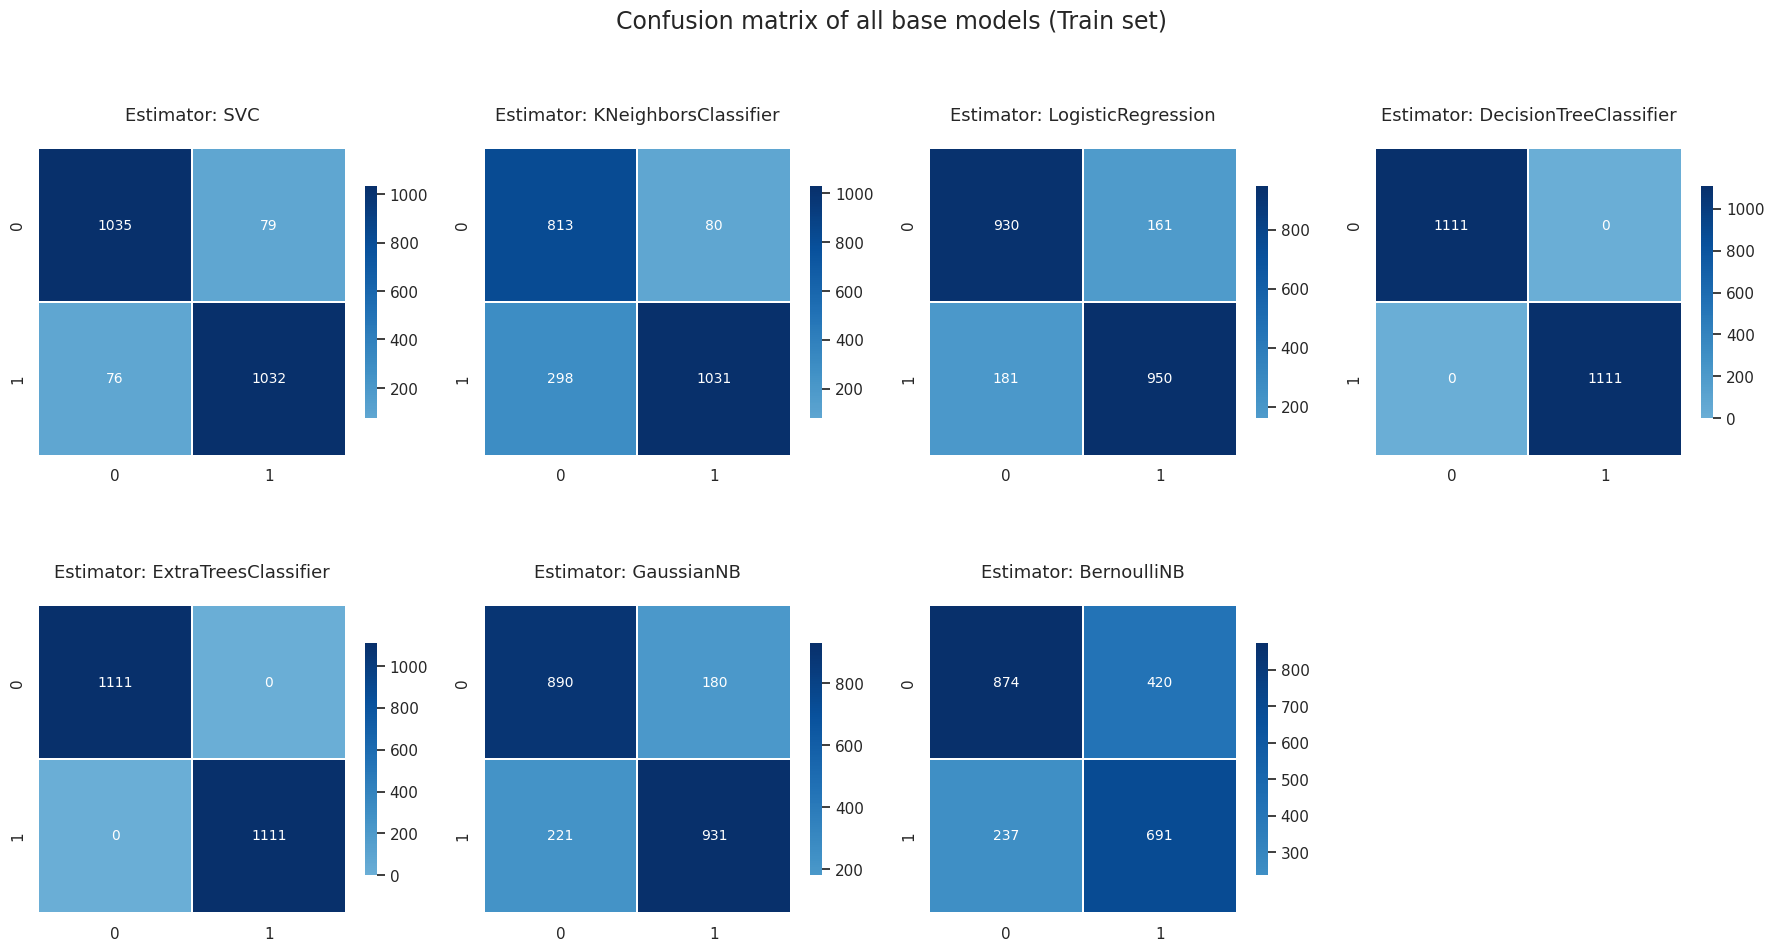

In [49]:
def plot_matrices(con_matrix, plot_name:None) -> None:
        

    num_cols = 4  # Number of columns for the heatmap grid
    num_rows = (len(con_matrix) + num_cols - 1) // num_cols  # Calculate number of rows to accommodate all models

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

    # Flatten the 2D array of subplots into a 1D array for easier iteration
    axes = axes.ravel()

    # Set a common title for the entire heatmap
    fig.suptitle(f"Confusion matrix of all base models ({plot_name})", y=1, fontsize=17)

    for i, model_name in enumerate(con_matrix):
        ax = axes[i]  # Get the current subplot

        # Create a heatmap for the confusion matrix of the current model
        sns.heatmap(con_matrix[model_name], cmap='Blues', center=0,
                    square=True, linewidths=0.01, cbar_kws={"shrink": 0.5},
                    annot=True, fmt=".0f", annot_kws={"fontsize": 10},
                    linecolor='white', cbar=True, ax=ax)

        # Set the title for the current subplot with the model name
        ax.set_title(f"Estimator: {model_name}", fontsize=13, pad=20)

    # Remove extra subplots if there are fewer models than the grid can hold
    if len(con_matrix) < num_cols * num_rows:
        for i in range(len(con_matrix), num_cols * num_rows):
            fig.delaxes(axes[i])

    # Adjust spacing between subplots for better readability
    plt.tight_layout()
    plt.show()

plot_matrices(confusion_matrices["train"], "Train set")

### Confusion matrix for test set

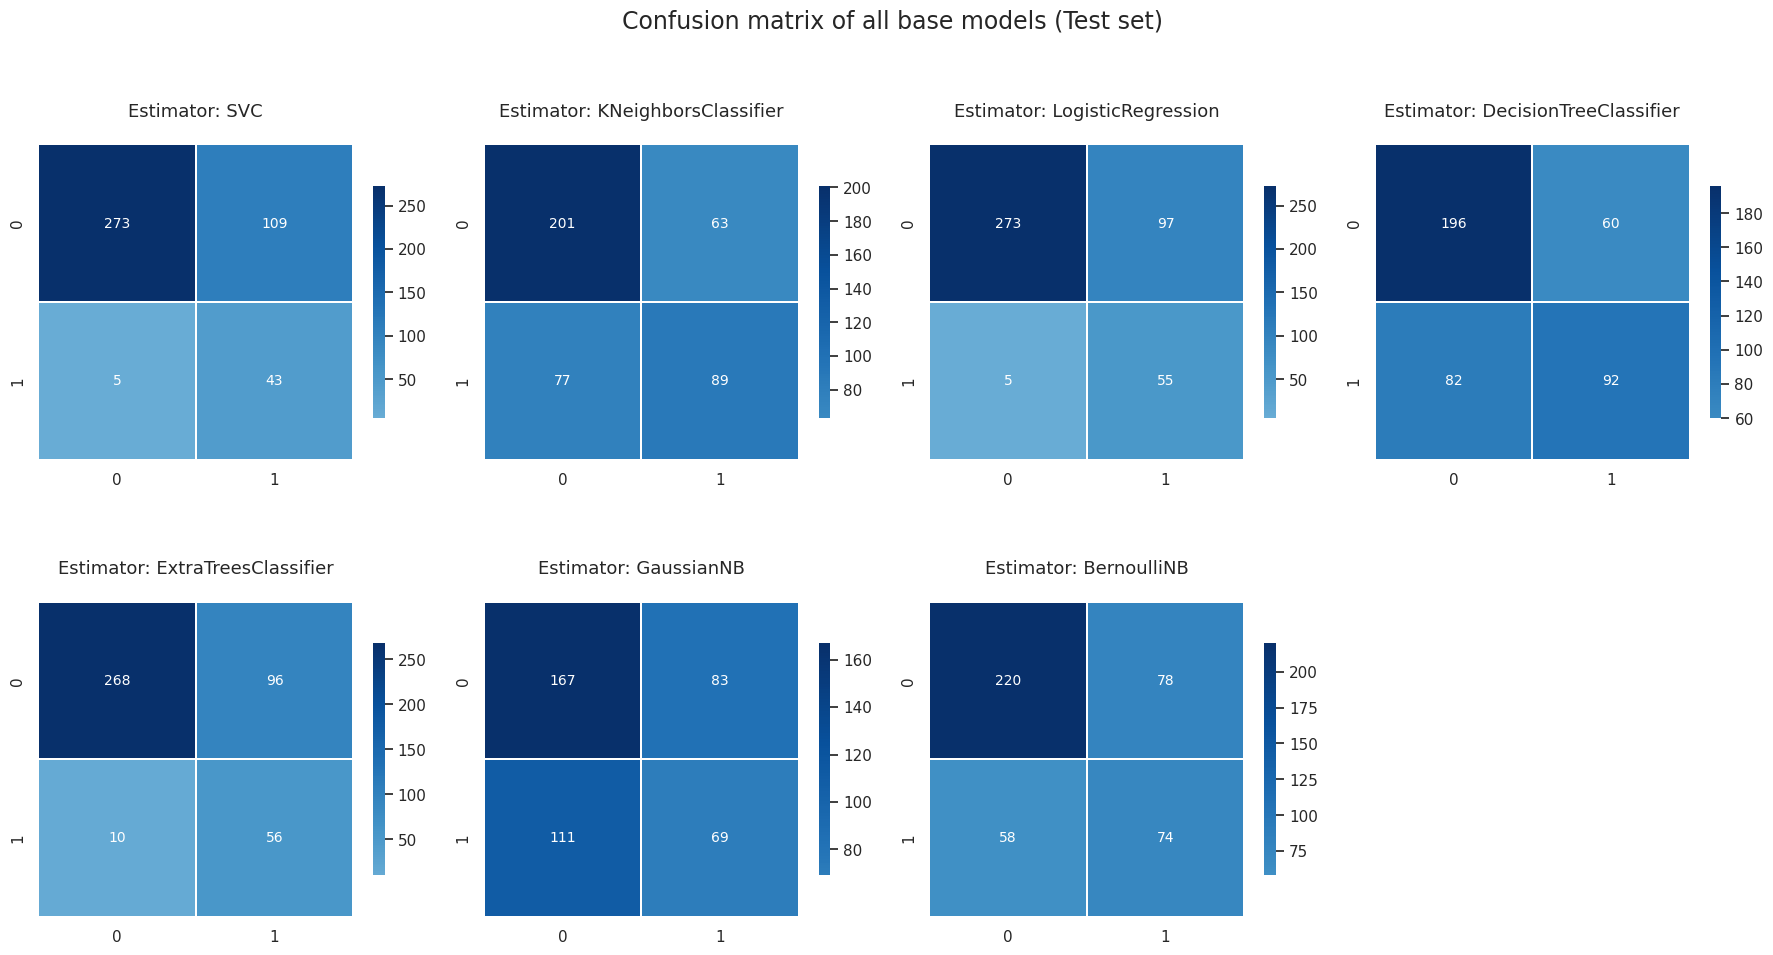

In [50]:
plot_matrices(confusion_matrices["test"], "Test set")

### Classification reports for base models

In [51]:
def make_report_(reports, name_set):
    """
    Processes classification reports and organizes them into a DataFrame.

    Args:
    ----
        reports (dict): Dictionary of model names and their corresponding classification reports (strings).
        name_set (str): Dataset identifier (e.g., 'Train_set', 'Test_set').

    Returns:
    -------
        pd.DataFrame: DataFrame containing the processed classification reports.
    """

    df_reports = pd.DataFrame()                                 # Initialize an empty DataFrame
    df_break = pd.DataFrame([0]).transpose()                    # Create a DataFrame for empty rows

    for model_name, report in reports.items():
        df_report = pd.DataFrame([line.split(' '*6)                         # Parse the report string and create a DataFrame
                                 for line in report.split('\n')], 
                                columns=['Metric','Class', 
                                         'Precision', 'Recall', 
                                         'F1score', 'support']).dropna() 
        
        df_report = pd.concat([df_report, df_break])                     # Add an empty row for better readability
        df_report['Model_name'] = pd.Series([model_name]*6)              # Add 'Model_name' column
        df_report.set_index(['Model_name', 'Metric'], inplace=True)      # Set 'Model_name' and 'Metric' as multi-index
        df_report.fillna(' ', inplace=True)                              # Fill missing values with spaces
        df_reports = pd.concat([df_reports, df_report])                  # Concatenate to the main DataFrame
        
    df_reports.drop(columns={0, 'support'}, inplace=True)  # Drop unnecessary columns
    tups = zip(*[[name_set]*4,df_report.columns])  # Create hierarchical column names    
    df_reports.columns = pd.MultiIndex.from_tuples(tups)

    return df_reports


def make_df_reports(classification_reports):
    """
    Concatenates training and testing classification reports into a single DataFrame.

    Args:
    ----
        classification_reports (dict): Dictionary containing 'train' and 'test' keys, 
                                      each mapping to a dictionary of model names and their reports.

    Returns:
    -------
        pd.DataFrame: DataFrame containing both training and testing reports.
    """

    df_reports = pd.concat([    # Concatenate horizontally
        make_report_(classification_reports["train"], 'Train_set').assign(I=''), 
        make_report_(classification_reports["test"], 'Test_set')
    ], axis=1)  

    return df_reports

make_df_reports(classification_reports)

Train_set                           I Test_set            \
                                        Class Precision Recall  F1score      Class Precision   
Model_name             Metric                                                                  
SVC                                       0.0      0.93   0.93     0.93        0.0      0.98   
                                          1.0      0.93   0.93     0.93        1.0      0.28   
                           accuracy                                0.93                        
                       NaN                                                                     
KNeighborsClassifier                      0.0      0.73   0.91     0.81        0.0      0.72   
                                          1.0      0.93   0.78     0.85        1.0      0.59   
                           accuracy                                0.83                        
                       NaN                                                                     
LogisticRegression                        0.0      0.84   0.85     0.84        0.0      0.98   
                                          1.0      0.86   0.84     0.85        1.0      0.36   
                           accuracy                                0.85                        
                       NaN                                                                     
DecisionTreeClassifier                    0.0      1.00   1.00     1.00        0.0      0.71   
                                          1.0      1.00   1.00     1.00        1.0      0.61   
                           accuracy                                1.00                        
                       NaN                                                                     
ExtraTreesClassifier                      0.0      1.00   1.00     1.00        0.0      0.96   
                                          1.0      1.00   1.00     1.00        1.0      0.37   
                           accuracy                                1.00                        
                       NaN                                                                     
GaussianNB                                0.0      0.80   0.83     0.82        0.0      0.60   
                                          1.0      0.84   0.81     0.82        1.0      0.45   
                           accuracy                                0.82                        
                       NaN                                                                     
BernoulliNB                               0.0      0.79   0.68     0.73        0.0      0.79   
                                          1.0      0.62   0.74     0.68        1.0      0.49   
                           accuracy                                0.70                        
                       NaN                                                                     

                                                     
                                    Recall  F1score  
Model_name             Metric                        
SVC                                   0.71     0.83  
                                      0.90     0.43  
                           accuracy            0.73  
                       NaN                           
KNeighborsClassifier                  0.76     0.74  
                                      0.54     0.56  
                           accuracy            0.67  
                       NaN                           
LogisticRegression                    0.74     0.84  
                                      0.92     0.52  
                           accuracy            0.76  
                       NaN                           
DecisionTreeClassifier                0.77     0.73  
                                      0.53     0.56  
                           accuracy            0.67  
                       NaN                           
ExtraTreesClassifier             

### *Classification reports for advanced model*

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1111, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4377
[LightGBM] [Info] Number of data points in the train set: 2222, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Learning rate set to 0.014488
0:	learn: 0.6752287	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.6560241	total: 78.5ms	remaining: 39.2s
2:	learn: 0.6407736	total: 86.7ms	remaining: 28.8s
3:	learn: 0.6238028	total: 91.3ms	remaining: 22.7s
4:	learn: 0.6077689	total: 102ms	remaining: 20.3s
5:	learn: 0.5933399	total: 110ms	remaining: 18.1s
6:	learn: 0.5799918	total: 112ms	remaining: 15.9s
7:	learn: 0.5650746	total: 120ms	rem

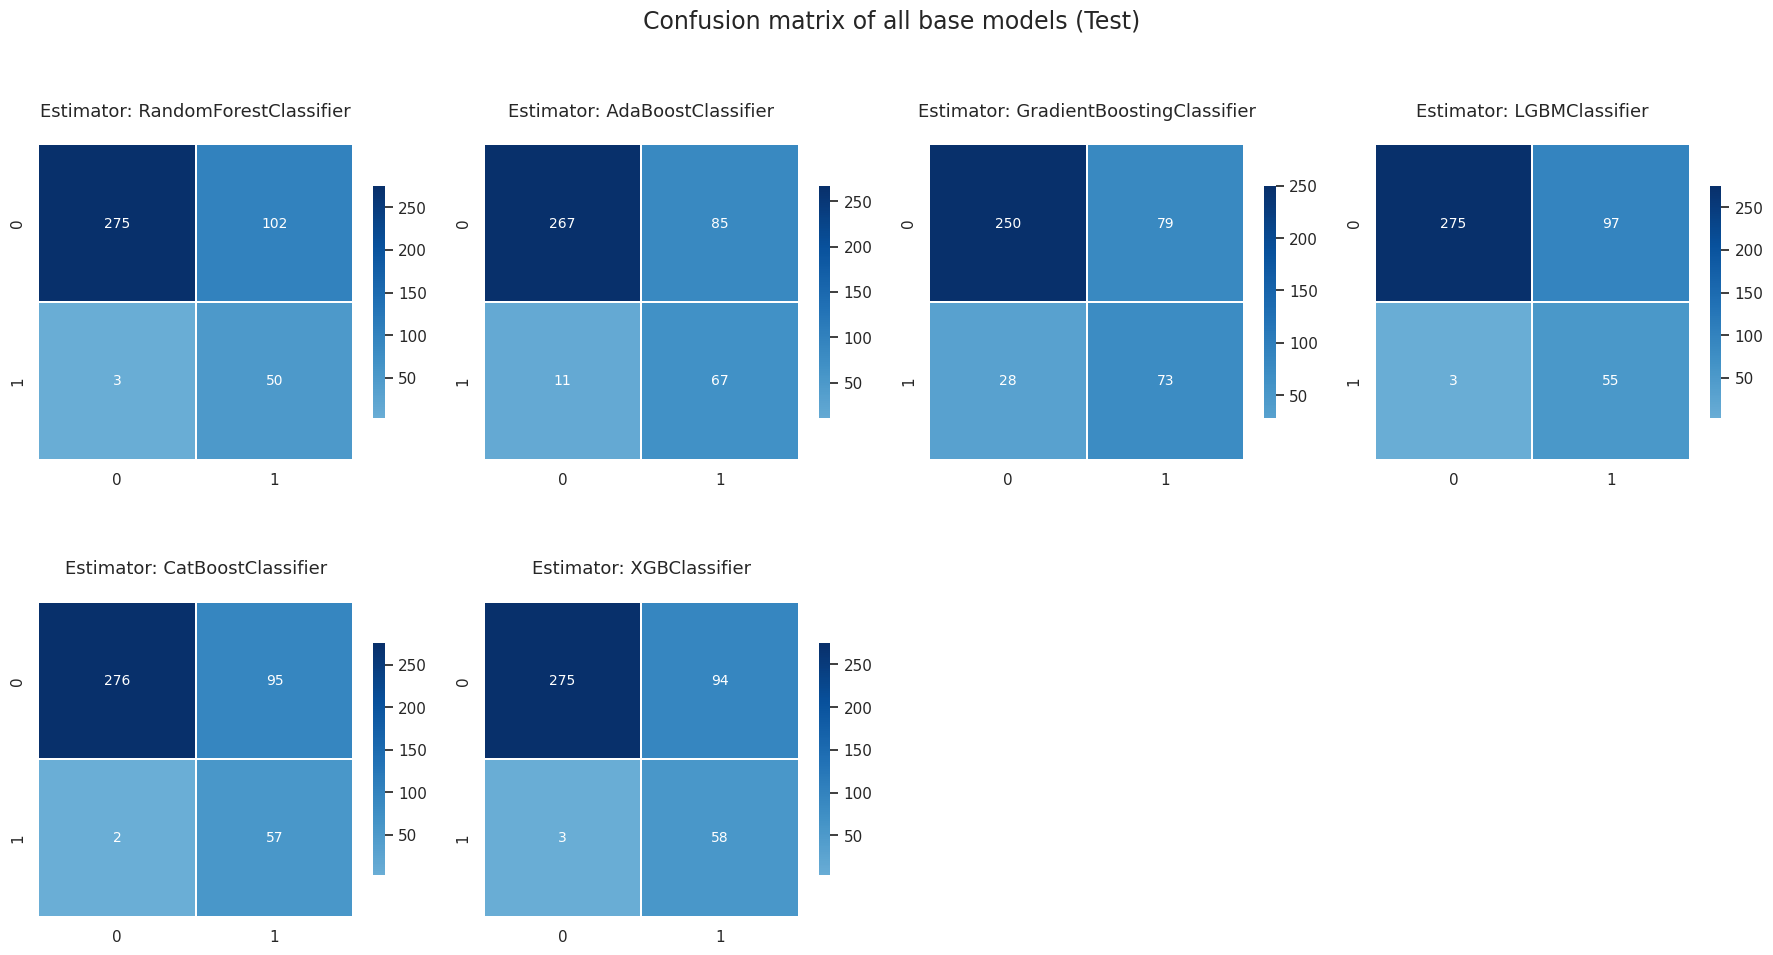

Train_set                           I Test_set            \
                                            Class Precision Recall  F1score      Class Precision   
Model_name                 Metric                                                                  
RandomForestClassifier                        0.0      1.00   1.00     1.00        0.0      0.99   
                                              1.0      1.00   1.00     1.00        1.0      0.33   
                               accuracy                                1.00                        
                           NaN                                                                     
AdaBoostClassifier                            0.0      0.89   0.93     0.91        0.0      0.96   
                                              1.0      0.93   0.89     0.91        1.0      0.44   
                               accuracy                                0.91                        
                           NaN                                                                     
GradientBoostingClassifier                    0.0      0.98   0.95     0.97        0.0      0.90   
                                              1.0      0.95   0.98     0.96        1.0      0.48   
                               accuracy                                0.97                        
                           NaN                                                                     
LGBMClassifier                                0.0      1.00   1.00     1.00        0.0      0.99   
                                              1.0      1.00   1.00     1.00        1.0      0.36   
                               accuracy                                1.00                        
                           NaN                                                                     
CatBoostClassifier                            0.0      0.99   1.00     1.00        0.0      0.99   
                                              1.0      1.00   0.99     1.00        1.0      0.38   
                               accuracy                                1.00                        
                           NaN                                                                     
XGBClassifier                                   0      1.00   1.00     1.00          0      0.99   
                                                1      1.00   1.00     1.00          1      0.38   
                               accuracy                                1.00                        
                           NaN                                                                     

                                                         
                                        Recall  F1score  
Model_name                 Metric                        
RandomForestClassifier                    0.73     0.84  
                                          0.94     0.49  
                               accuracy            0.76  
                           NaN                           
AdaBoostClassifier                        0.76     0.85  
                                          0.86     0.58  
                               accuracy            0.78  
                           NaN                           
GradientBoostingClassifier                0.76     0.82  
                                          0.72     0.58  
                               accuracy            0.75  
                           NaN                           
LGBMClassifier                            0.74     0.85  
                                          0.95     0.52  
                               accuracy            0.77  
                           NaN                           
CatBoostClassifier                        0.74     0.85  
                                          0.97     0.54  
                               accuracy            0.77  
                           NaN                           
XGBCl

In [52]:
confusion_matrices, classification_reports = validate_models(base_advanced_models,
                                                             X_train_imputed_rescaled_resampled, y_train_resampled,
                                                             X_test_imputed_rescaled, y_test)

plot_matrices(confusion_matrices["test"], "Test")
make_df_reports(classification_reports)


## Hyperparameter

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Cross Validation

In [54]:
from sklearn.model_selection import cross_validate

def cross_val_df(single_model, X, y):
    
    cv_result = (single_model.__class__.__name__ , cross_validate(single_model, 
                                                                  X, y,
                                                                  scoring=['precision', 'recall', 'f1', 'accuracy',], 
                                                                  cv=5, 
                                                                  return_train_score=True, 
                                                                  verbose=True))

    df_cv = pd.DataFrame(cv_result[2]).mean().to_frame().transpose()
    df_cv['Model'] = cv_result[0]

    df_cv.set_index('Model', inplace=True)
    df_cv.columns = [ 'train_precision','train_recall', 'train_f1', 'train_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_accuracy','fit_time', 'score_time']

    return df_cv


### Logistic Regression

In [55]:
logistic = LogisticRegression()

param_grid = {"penalty" : ['l1', 'l2', 'elasticnet'],
                "solver" : ['lbfgs', 'liblinear']}

grid_search = GridSearchCV(logistic,
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=5,
                           verbose=True)

grid_search

# cross_val_df(grid_search, X_train_imputed_rescaled_resampled, y_train_resampled.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=True)

In [56]:
cross = cross_validate(grid_search, 
            X_train_imputed_rescaled_resampled, y_train_resampled.values.ravel(),
            scoring=['precision', 'recall', 'f1', 'accuracy',], 
            cv=10, 
            return_train_score=True, 
            verbose=True)

pd.DataFrame(cross)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
0,3.283571,0.010191,0.830189,0.847591,0.792793,0.862000,0.811060,0.854735,0.816143,0.853427
1,0.234434,0.010776,0.851485,0.844727,0.767857,0.865866,0.807512,0.855166,0.816143,0.853427
2,0.340823,0.013762,0.833333,0.841642,0.810811,0.861000,0.821918,0.851211,0.824324,0.849500
3,0.350099,0.010299,0.827586,0.845391,0.864865,0.853000,0.845815,0.849179,0.842342,0.848500
4,0.361436,0.013624,0.844037,0.840237,0.828829,0.852000,0.836364,0.846077,0.837838,0.845000
5,0.302556,0.005592,0.823529,0.841535,0.882883,0.855000,0.852174,0.848214,0.846847,0.847000
6,0.303396,0.009572,0.831933,0.839409,0.891892,0.852000,0.860870,0.845658,0.855856,0.844500
7,0.266366,0.009921,0.841667,0.843098,0.909910,0.849000,0.874459,0.846039,0.869369,0.845500
8,0.276733,0.009141,0.882883,0.843625,0.882883,0.847000,0.882883,0.845309,0.882883,0.845000
9,0.255549,0.006037,0.782258,0.843350,0.873874,0.856000,0.825532,0.849628,0.815315,0.848500


### XGBoost

In [57]:
# xgb = XGBClassifier()

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.9],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0, 0.01, 0.1, 1],
#     'scale_pos_weight': [1, 2, 5]
# }

# grid_search = GridSearchCV(xgb, 
#                            param_grid=param_grid,
#                            verbose=True,
#                            scoring='roc_auc',
#                            cv=5,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

In [58]:
# best_params = random_search.best_params_

# # Create the final XGBClassifier model with the best parameters
# xgb_tuned = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# # Train the final model on the full training data
# xgb_tuned.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = xgb_tuned.predict(X_test)

# # Get predicted probabilities (useful for ROC-AUC)
# # y_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)

In [59]:
# y_pred = grid_search.best_estimator_.predict(X_test)

# confusion_mx = confusion_matrix(y_pred, y_test)

# sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
#                 square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
#                 annot=True, fmt=".3f", annot_kws={"fontsize": 10},
#                 linecolor='white', cbar=True, ax=ax)

# print(classification_report(y_pred, y_test))


### Random Forest

In [60]:
# random_forest = RandomForestClassifier()

# params = {
#     'n_estimators': [50, 200, 300, 500, 1000],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'min_weight_fraction_leaf': [0.0, 0.1, 0.2,0.4, 0.5],
#     'max_features': ['sqrt', 'log2', None],
#     'max_leaf_nodes': [None, 10, 20, 30, 50],
#     'max_samples': [None, 0.5, 0.75, 1.0]}

# random_search = RandomizedSearchCV(random_forest,
#                                    param_distributions=params,
#                                    n_iter=50,
#                                    scoring='roc_auc',
#                                    cv=5,
#                                    verbose=3,
#                                    random_state=42,
#                                    n_jobs=-1)

# random_search.fit(X_train, y_train)




In [61]:
# best_param = random_search.best_params_

# rf_tuned = RandomForestClassifier(**best_param)

# rf_tuned.fit(X_train, y_train)

# y_pred = rf_tuned.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)

In [62]:
# y_pred = random_search.best_estimator_.predict(X_test)

# confusion_mx = confusion_matrix(y_pred, y_test)

# sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
#                 square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
#                 annot=True, fmt=".3f", annot_kws={"fontsize": 10},
#                 linecolor='white', cbar=True, ax=ax)

# print(classification_report(y_pred, y_test))

### SVC (Support Vector Machine)

In [63]:
svc = SVC()


### KNearestNeighbor

In [64]:
knn = KNeighborsClassifier()

***

## Neural Network

In [65]:
from tensorflow import keras

X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, train_size=0.7, random_state=16)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=10)

X_train.shape, X_test.shape, X_val.shape

2024-12-25 20:22:35.551724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-25 20:22:35.675253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-25 20:22:35.697463: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 20:22:35.933441: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-25 20:22:38.176471: W tensorflow/compiler/tf2

((1504, 35), (323, 35), (322, 35))

In [66]:
model_nn = keras.Sequential()
model_nn.add(keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(keras.layers.Dense(512, activation='relu'))
model_nn.add(keras.layers.Dense(256, activation='relu'))
model_nn.add(keras.layers.Dense(128, activation='relu'))
model_nn.add(keras.layers.Dense(64, activation='relu'))
model_nn.add(keras.layers.Dense(32, activation='relu'))
model_nn.add(keras.layers.Dropout(0.3))
model_nn.add(keras.layers.Dense(1, activation='sigmoid'))

I0000 00:00:1735132959.386752    5229 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735132959.548149    5229 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735132959.548830    5229 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735132959.550873    5229 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [67]:
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=keras.losses.binary_crossentropy,
              metrics=["accuracy", "auc"])


In [68]:
model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 736,257 (2.81 MB)

 Trainable params: 736,257 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                           min_delta=0,
                                           mode="max",
                                           patience=30,
                                           restore_best_weights=True)

history = model_nn.fit(X_train, y_train,
                       epochs = 200,
                       validation_data = (X_val, y_val),
                       callbacks = [early_stop],
                       batch_size= 128,
                       )

Epoch 1/200


I0000 00:00:1735132965.659212    8577 service.cc:146] XLA service 0x78c3ac0117c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735132965.659367    8577 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-12-25 20:22:45.757502: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-25 20:22:46.185659: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:42 9s/step - accuracy: 0.6328 - auc: 0.5138 - loss: nan

I0000 00:00:1735132970.955075    8577 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 630ms/step - accuracy: 0.6439 - auc: 0.5036 - loss: nan - val_accuracy: 0.6491 - val_auc: 0.5000 - val_loss: nan
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6519 - auc: 0.5000 - loss: nan - val_accuracy: 0.6491 - val_auc: 0.5000 - val_loss: nan
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6532 - auc: 0.5000 - loss: nan - val_accuracy: 0.6491 - val_auc: 0.5000 - val_loss: nan
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6438 - auc: 0.5000 - loss: nan - val_accuracy: 0.6491 - val_auc: 0.5000 - val_loss: nan
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6408 - auc: 0.5000 - loss: nan - val_accuracy: 0.6491 - val_auc: 0.5000 - val_loss: nan
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6440 - auc: 0.5000 - loss: nan - val_accuracy: 0.6491 - val_auc: 0.5000 - val_loss: nan
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6335 - auc: 0.5000 - loss:

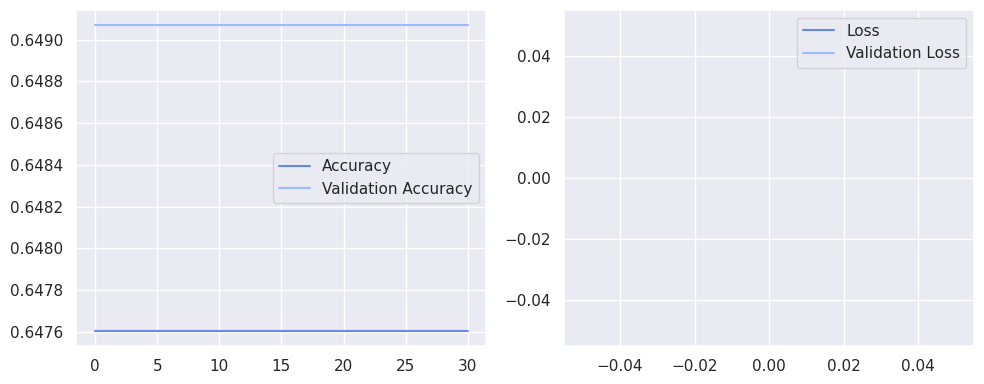

In [70]:

fig, axes = plt.subplots(1,2, figsize=(10,4))

axes = axes.ravel()

sns.lineplot(history.history['accuracy'], label='Accuracy', ax=axes[0])
sns.lineplot(history.history['val_accuracy'], label='Validation Accuracy', ax=axes[0])

sns.lineplot(history.history['loss'], label='Loss', ax=axes[1])
sns.lineplot(history.history['val_loss'], label='Validation Loss', ax=axes[1])

plt.tight_layout()
plt.legend()
plt.show()


In [71]:
from scikeras.wrappers import KerasClassifier

KerasClassifier()


KerasClassifier(
	model=None
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

***

## Inferences pipeline

[pipeline]("https://tiaplagata.medium.com/how-scikit-learn-pipelines-make-your-life-so-much-easier-3cfbfa1d9da6)

***
## Save models

### *Pickle*

- *The pickle package is faster in saving and loading models.*

- *The pickle package is over 10 times faster than joblib for saving and loading models*

In [72]:
from pickle import dump

for model in base_models:
    dump(models, open(f"saved_models/{model.__class__.__name__}.pickle","wb"))



### *Joblib (same api as pickle)* 

In [73]:
# import joblib

# for model in base_models:
#     joblib.dump(models, f"saved_models/{model.__class__.__name__}.joblib")


***
## Load models

In [74]:
# import pickle

# loaded_model = pickle.load(open("saved_models/SVC.pickle", "rb"))
# loaded_model

# loaded_model[0]


***
## Deploy models

In [75]:
import numpy as np
import pickle

In [76]:
lists = [float(num) for num in parsed_str]
lists

NameError: name 'parsed_str' is not defined